<div class="alert alert-info">
Перед нами данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2016 года. Нам нужно выявить определяющие успешность игры закономерности. Чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

<div class="alert alert-info">
План:
    
1. Откроем файл с данными и изучим общую информацию.
2. Подготовим данные. Преобразуем данные, заполним пропуски, посчитайте суммарные продажи, выделив данные в отдельную колонку
3. Проведем исследовательский анализ данных. Подробнее изучим данные о платформах. Выделим актуальные данные. Изучим зависимость продаж по каким-либо факторам. Опишем результаты.
4. Составим портрет пользователя каждого региона.
5. Поставим и проверим гипотезы.
6. Сформулируем общий вывод по проведенному анализу.

<div class="alert alert-info">
Нам доступны следующие данные:
    
1. Название игры
2. Платформа
3. Год выпуска
4. Жанр игры
5. Продажи в Северной Америке, в Европе, в Японии, в других странах (миллионы проданных копий)
6. Оценка критиков и пользователей 
7. Рейтинг от организации ESRB

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

pd.set_option('display.max_columns', None)     

In [2]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


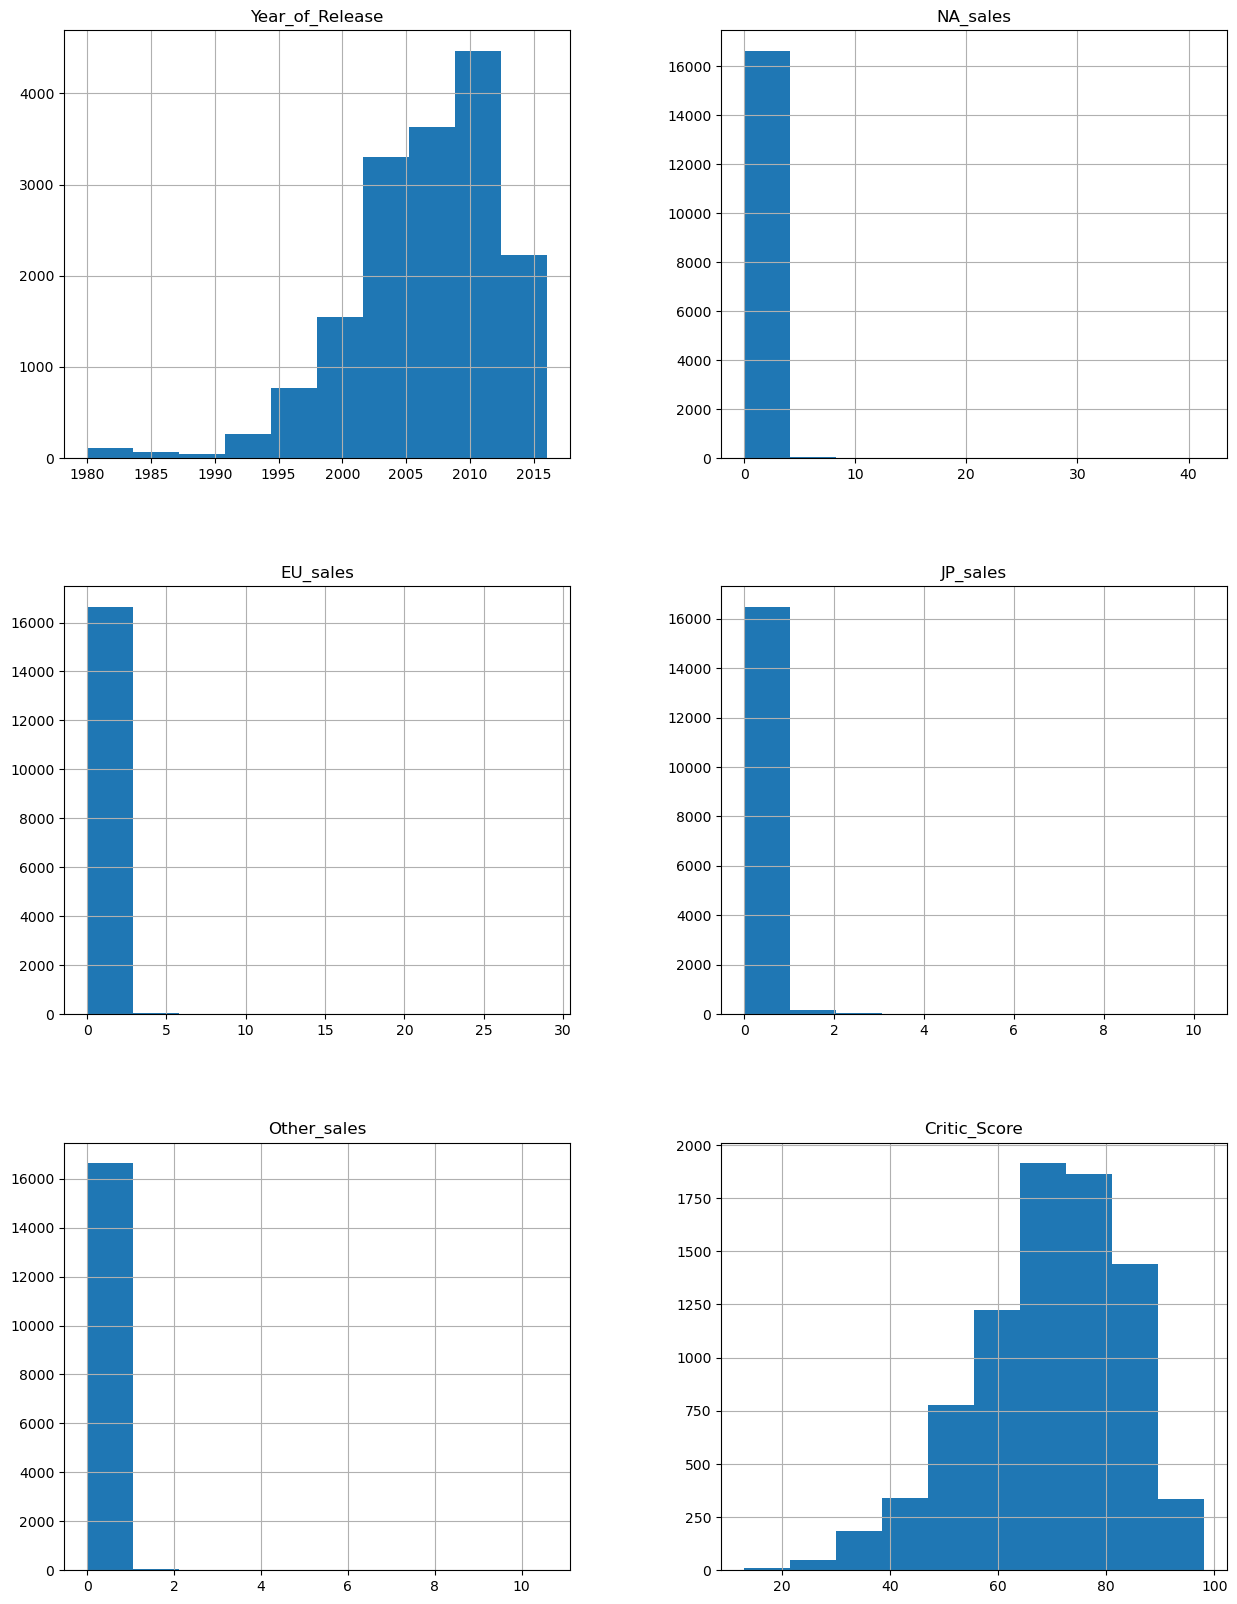

In [3]:
data.hist(figsize=(15, 20));

<div class="alert alert-info">
    Что можем сказать при первом взгляде на  данные:
    
1. С 1991 года по 2012 год был рост выпуска игр. За период с 2009 по 2012 было выпущено большего всего игр. После 2012 года резкий спад. Стоит выяснить с чем это может быть связано.
2. Видим равномерные продажи игр по регионам. 
3. В основном критики ставили оценку 65-81 баллов.
4. Установили наличие пропусков в столбцах: name, year_of_release, genre, critic_score, user_score, rating.
5. С помощью метода .describe() получили данные: стандартное отклонение, среднее и медианое значение по столбцам

In [4]:
data.columns = data.columns.str.lower() # Оптимальный вариант
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
old_data = data
old_data.shape[0]

16715

-------------------------------------------------------------------------------------------------------------------------------

#### Пропуски есть в: 
1. name (удалить). Возможная причина появления - ошибка в выгрузке данных.             
2. year_of_release  (удалить). Возможная причина появления - ошибка в выгрузке данных/ данные не были указаны, так как могут быть точно неизвестны для определенных платформ.
3. genre (удалить). Возможная причина появления - ошибка в выгрузке данных/ трудно определить жанр, или он не представлен в выборе.
4. critic_score . Возможная причина появления - Критики не оценивали игру. К примеру, кому (каким профессионалам) нужно оценивать игру для детей?)     
5. user_score . Возможная причина появления - Мало пользователей оценило игру или не оценили вообще. 
6. rating . Возможная причина появления - Организация не приявила игре возрастную категорию, по ряду причин. К примеру, игра вышла раньше, чем была признана данная организация, малоизвестная игра и т.д.           



Для начала проверим дубликаты

In [7]:
data.duplicated().sum()
# Явных дубликатов нет

0

In [8]:
data['name'] = data['name'].str.lower()
data['name'].value_counts()
data['name'].duplicated().sum()
# Проверили, чтобы одно и то же название игры было верно указано

5155

In [9]:
data['genre'].unique() 
# Проверяем, чтобы один и тот же жанр был верно указан

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [10]:
data['year_of_release'] = data['year_of_release'].fillna(0)
data['year_of_release'] = data['year_of_release'].astype(int)

In [11]:
data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype(int)

In [12]:
#data.astype({ "critic_score": "int64", "year_of_release": "int64"})
#data.fillna({ "critic_score": 0, "year_of_release": 0})

In [13]:
data['name'] = data['name'].fillna('unknow') 
# В столбце name пропуски назовем unknown и удалим их.

In [14]:
data['genre'] = data['genre'].fillna('unknow')

In [15]:
data = data.query('name != "unknow"')

In [16]:
data = data.query('year_of_release != 0')

In [17]:
data = data.query('genre != "unknow"')

In [18]:
data.shape[0]

16444

In [19]:
# data['user_score'].unique()
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'unknown' 
data['user_score'] = data['user_score'].fillna('unknown') 
#Замена tbd и пропуски на unknown, потому что будем считать происхождение пропусков и tbd одинаковое 
#(Пользователями не были оценены данные игры). Поэтому на данный момент будем считать так.

In [20]:
#data['rating'].value_counts()

In [21]:
data.shape[0] / old_data.shape[0]
# Было удалено 2% строк

0.9837870176488184

In [22]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

1. Проверил уникальность названий, игровых платформ и  жанров, чтобы не возникли дубликаты
2. Привел значения в столбцах с годом выхода и с оценками критиков к целочислительному значению, так как год не может быть с половиной, а критики присваивали только целочислительные оценки. 
3. Удалили строки с пропусками в столбцах с наименованием, жанром и датой выпуска игры, так как этих данных мало и мы заполнить их не можем. 
4. tbd - To Be Determined (будет определено) или To Be Decided (будет решено). Видимо, оценка пользователей еще не была сформирована. Возможно, мало пользователей оценило игру или еще никто не оценил. Будем считать так, поэтому привели эти значения и пропуски к unknown, так как пропуски могли возникнут по одним и тем же причинам. 
5. Пропуски в столбцах с оценками/рейтингами нельзя обработать, потому что на это влиент много факторов и на основе каких то данных трудно предугадать корректную информацию. К примеру, как мы можем по жанру, продажам, оценкам получить данные о возврастной катерии?
6. Было удалено 2% от изначального числа строк.
7. Создали столбец, в котором указана общая сумма продаж игры

-------------------------------------------------------------------------------------------------------------------------------

In [23]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,unknown,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,unknown,NaN,31.38


In [24]:
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Text(0, 0.5, 'Количество игр')

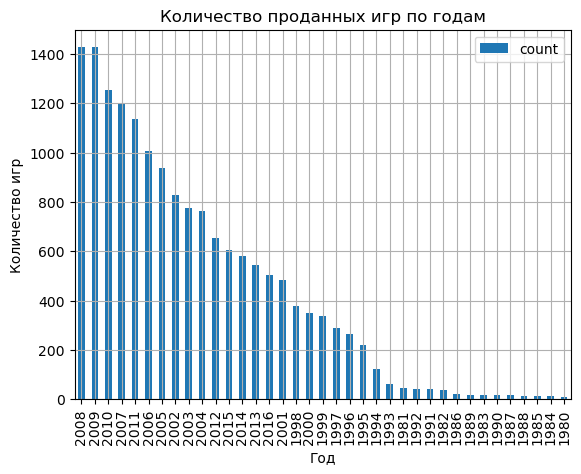

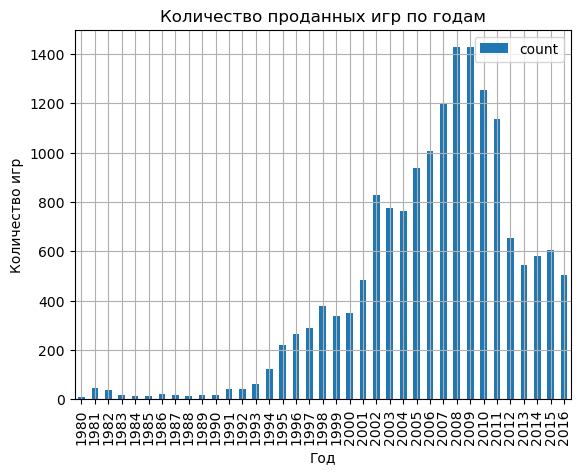

In [25]:
group_year = data.pivot_table(index='year_of_release', values='all_sales', aggfunc=['count']) 
group_year.columns = ['count']
group_year_sort = group_year.sort_values(by='count', ascending=False).plot(kind='bar',grid=True).set_title('Количество проданных игр по годам')
plt.xlabel("Год")
plt.ylabel("Количество игр")
group_year_plot = group_year.plot(kind='bar',grid=True).set_title('Количество проданных игр по годам')
plt.xlabel("Год")
plt.ylabel("Количество игр")

In [26]:
group_year.describe()

,count
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


In [27]:
data['year_of_release'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [28]:
data.query('year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,unknown,NaN,40.24
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,unknown,NaN,31.38
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,unknown,NaN,30.26
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,unknown,NaN,28.31
12,pokemon gold/pokemon silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0,unknown,NaN,23.09
...,...,...,...,...,...,...,...,...,...,...,...,...
16539,grand prix legends,PC,1997,Racing,0.00,0.01,0.00,0.00,0,7.5,E,0.01
16607,samurai shodown: warrios rage,PS,1999,Fighting,0.01,0.00,0.00,0.00,0,unknown,NaN,0.01
16666,psychic detective,PS,1995,Adventure,0.01,0.00,0.00,0.00,0,unknown,NaN,0.01
16681,worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,0,8.1,K-A,0.01


Видим, что в таблице представлена информация вплоть с 1980 года. Думаю, столь древние показатели вряд ли важны при планировании кампании на 2017 год. Во-первых, с давних времен многое поменялось и информация может быть некорректна по отнешению к современному этапу. Во-вторых, до 2003 года (с пиком продаж в 1998-1999 г.) было продано малое количество игр.   

Text(0.5, 1.0, 'Количество игр для платформы')

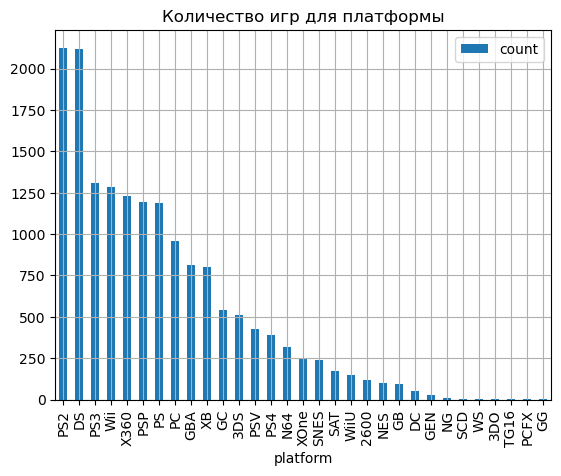

In [29]:
games_for_plat = (
    data.pivot_table(index='platform',values='all_sales', aggfunc='count')
)
games_for_plat.columns = ['count']
games_for_plat.sort_values(by='count', ascending=False).plot(kind='bar',grid=True).set_title('Количество игр для платформы')


Text(0.5, 1.0, 'Продажи игр по платформам')

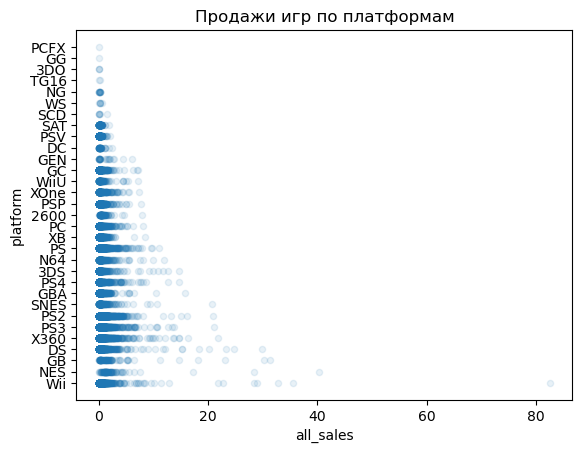

In [30]:
data.plot(x='all_sales', y='platform', kind='scatter', alpha=0.1).set_title('Продажи игр по платформам')

In [31]:
most_pop_plat = (
    data.pivot_table(index='platform',values='all_sales', aggfunc=['count', 'sum'])
)

In [32]:
most_pop_plat.columns = ['count', 'sum']

In [33]:
most_pop_plat.sort_values(by='count', ascending=False).head(10)
# Чаще игры продавались на эти платформах. То есть больше всего игр было выпущено для данных платформ. К примеру для PS2 было выпущено 2127 игр, который были проданы 1233,65 млн. раз

,count,sum
platform,,
PS2,2127,1233.56
DS,2121,802.78
PS3,1306,931.34
Wii,1286,891.18
X360,1232,961.24
PSP,1193,289.53
PS,1190,727.58
PC,957,255.76
GBA,811,312.88


In [34]:
most_pop_plat.sort_values(by='sum', ascending=False).head(10)
# Больше всего игр было продано для этих платформ. То есть покупатель чаще приобретал игры для платформ отображенных ниже
# К примеру для PS2 было выпущено 2127 игр, который были проданы 1233,65 млн. раз

,count,sum
platform,,
PS2,2127,1233.56
X360,1232,961.24
PS3,1306,931.34
Wii,1286,891.18
DS,2121,802.78
PS,1190,727.58
PS4,392,314.14
GBA,811,312.88
PSP,1193,289.53


Платформы с наибольшими суммарными продажами: WII, DS, X360, PS3, PS2, PS, PSP, PS4, GBA, 3DS 

In [35]:
all_sales_plat = (
    data.pivot_table(index='platform',values='all_sales', aggfunc=['sum'])
)
# Еще раз создаем сводную таблицу, в которой расположили информацию о продажах игровых платформ

In [36]:
all_sales_plat.columns = ['sales']

In [37]:
top_sales_plat = all_sales_plat.query('sales > 257')

In [38]:
top_sales_plat # Выявили 10 платформ с наибольшими суммарными продажами

,sales
platform,
3DS,257.81
DS,802.78
GBA,312.88
PS,727.58
PS2,1233.56
PS3,931.34
PS4,314.14
PSP,289.53
Wii,891.18


In [39]:
top_sales_plat_list = ['WII', 'DS', 'X360', 'PS3', 'PS2', 'PS', 'PSP', 'PS4', 'GBA', '3DS'] 
# Создали список с топ 10 платформами, используем его дальше. 

In [40]:
top_sales_plat_per_year = (
    data.query('platform in @top_sales_plat_list')
    .pivot_table(index='year_of_release', columns='platform', values='all_sales')
) 
# Создали сводную таблицу по продажам игр по годам для топ-10 платформ.

Text(0.5, 1.0, 'Продажи игр для топ-10 платформ по годам')

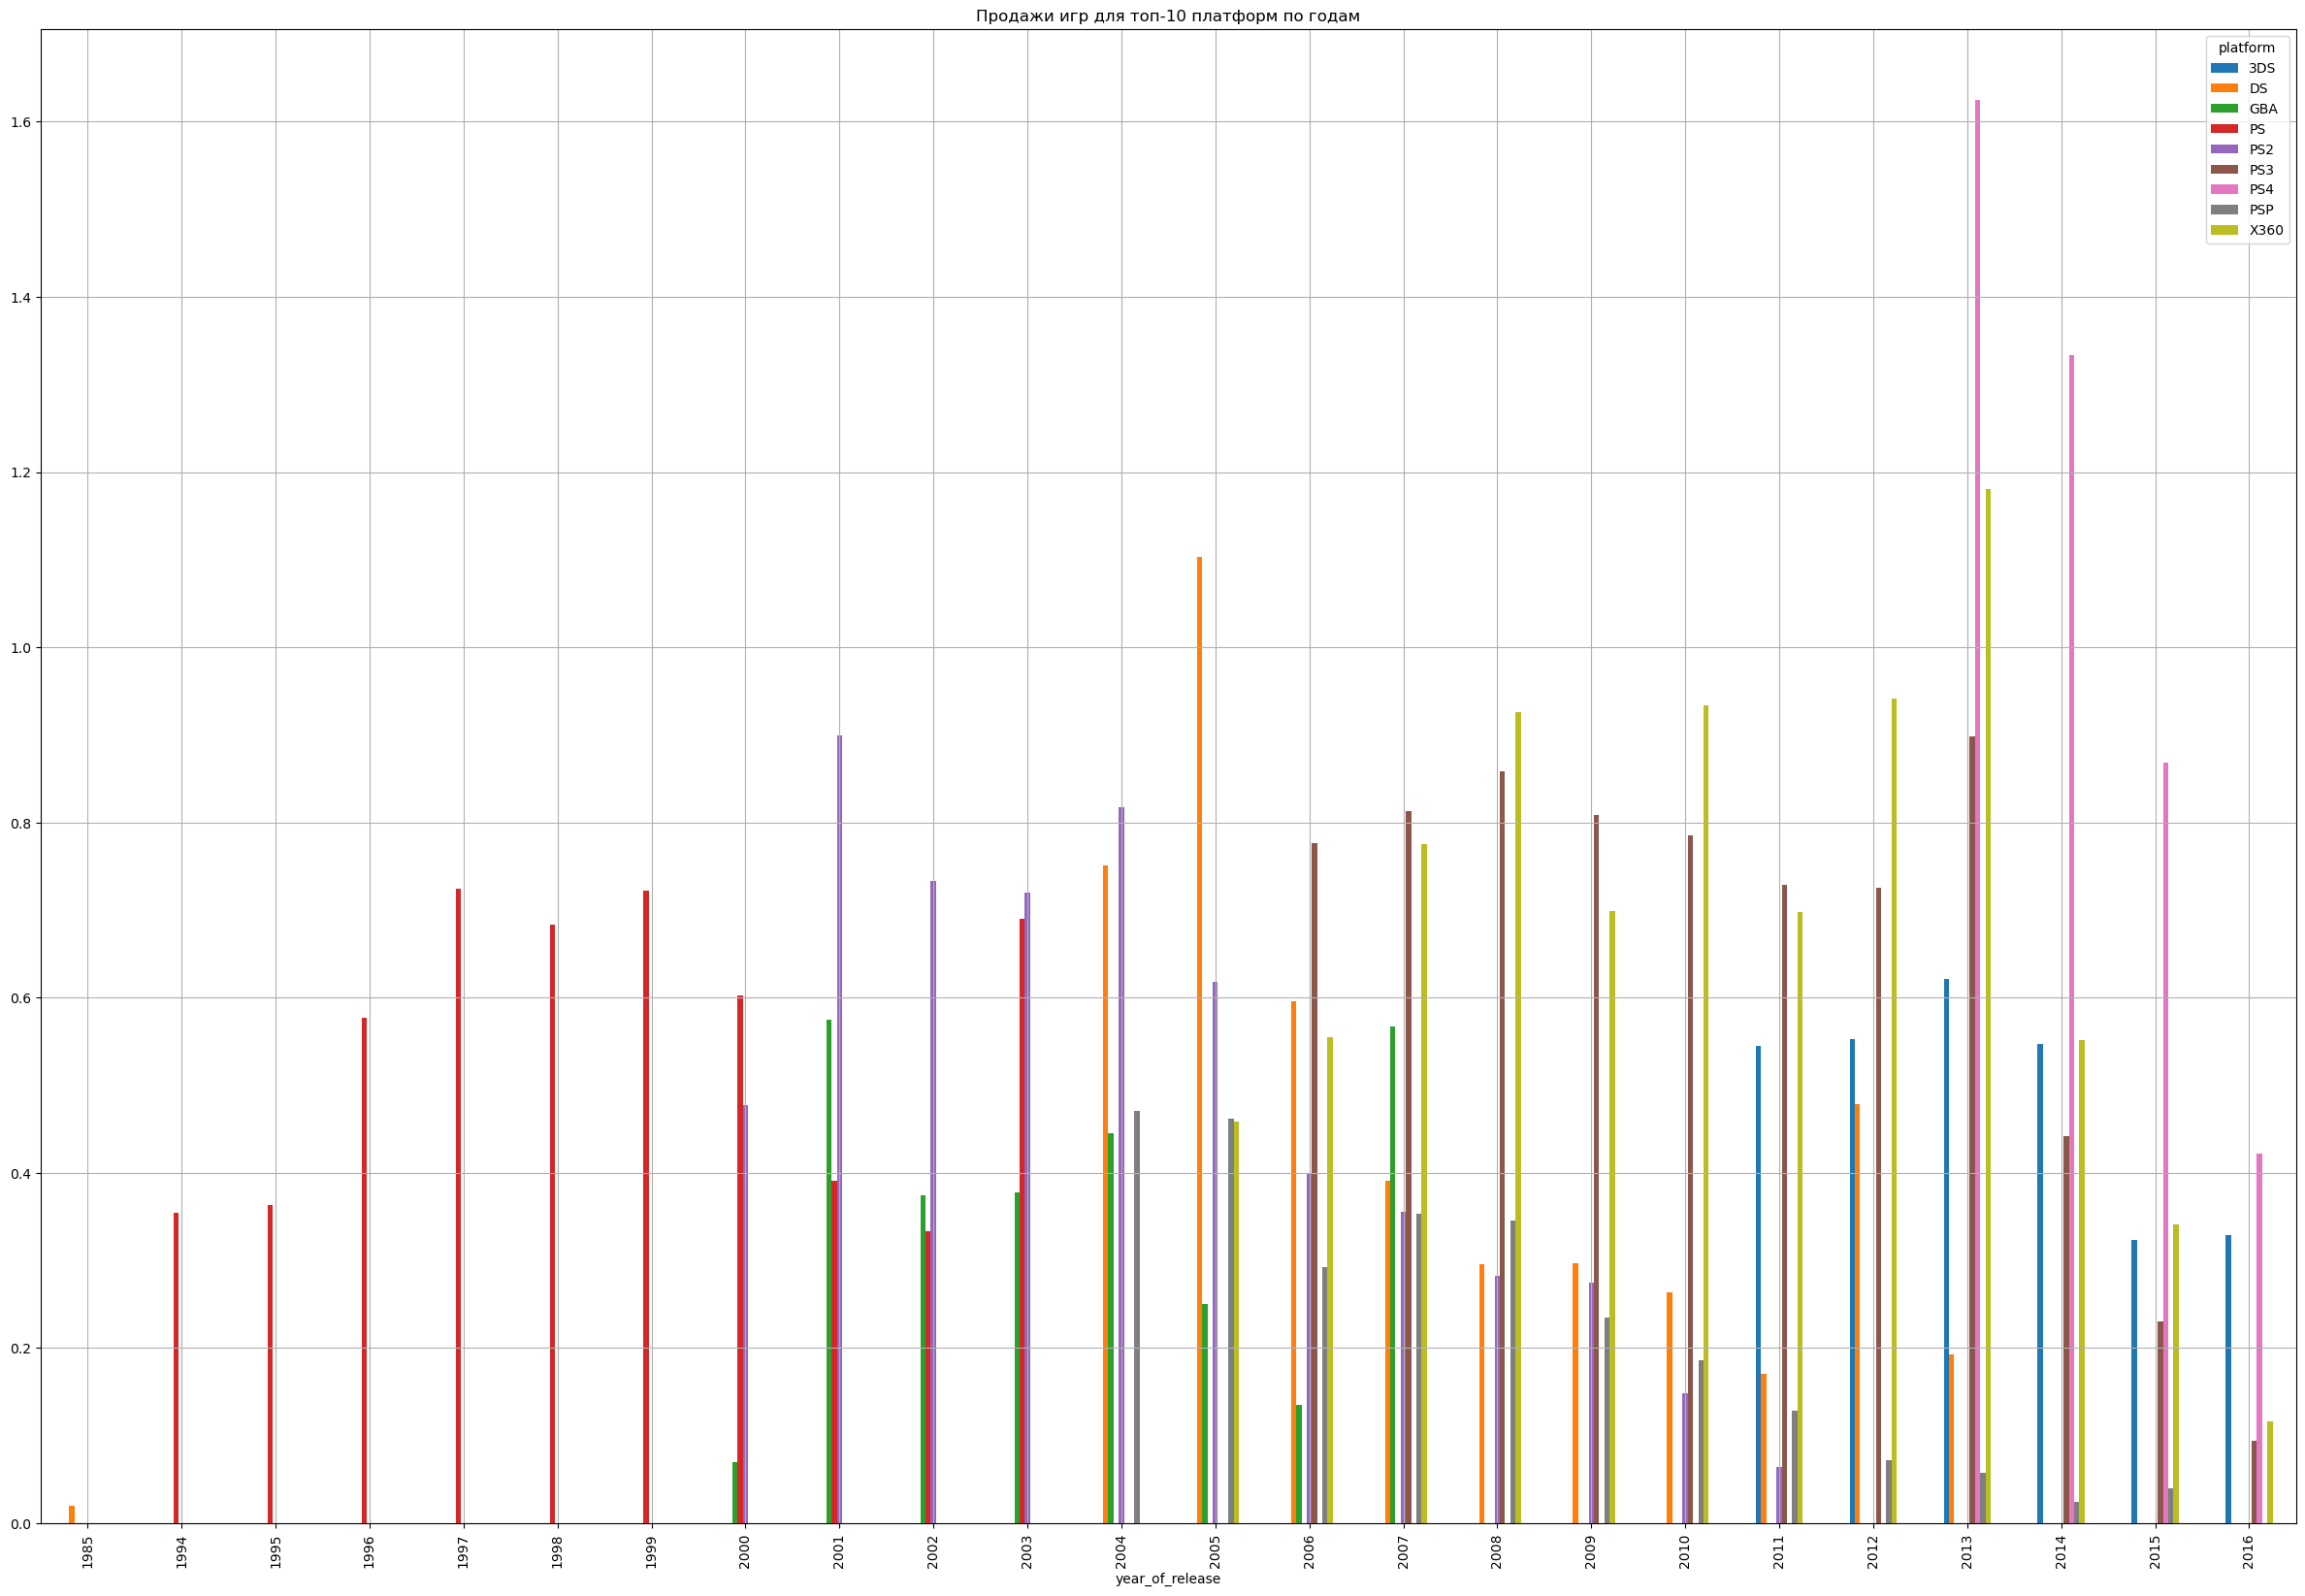

In [41]:
top_sales_plat_per_year.plot(kind='bar',grid=True, figsize=(30, 20)).set_title('Продажи игр для топ-10 платформ по годам')

Text(0.5, 1.0, 'Продажи игр для топ-10 платформ по годам')

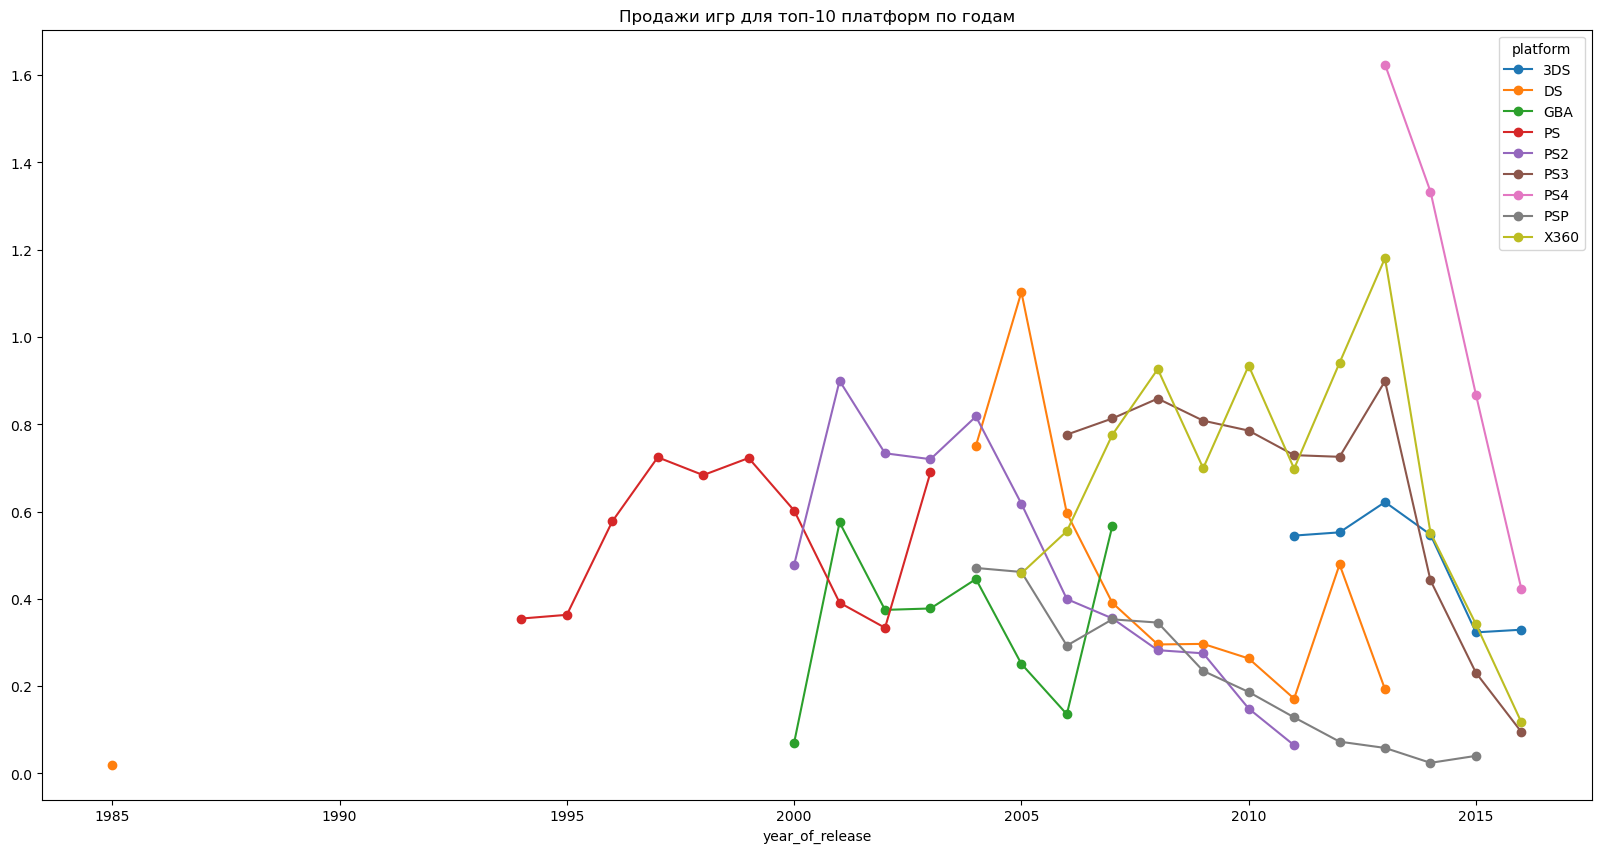

In [42]:
top_sales_plat_per_year.plot(style='o-', figsize=(20, 10)).set_title('Продажи игр для топ-10 платформ по годам')

За какой характерный срок появляются новые и исчезают старые платформы?
Промежуточный вывод:
1. Больше всего игр было куплено для платформы PS4 в 2013 году. Старт продаж данной платформы был очень успешный. При этом продажи игр для PS4 резко пошли на спад.
2. Выделяется платформа DS. Она была неуспешна, потому что просуществовала в течение года, в котором и появилась. При этом было продано мало игр для данной платформы. Возможно, была только одна игра на платформе DS - Тетрис. Такие низкие показатели (по сравнению с современными показателями) можно связать с тем, что это первые цифровые игры, а также цифровые технологии не были так развиты в эти года. 
3. Можно сказать, что настоящий прорыв в данной отрасли совершила платформа PS. После успешного старта продаж игр для этой платформы, резко появились конкуренты. 
4. Также можно отметить, что верхнее значение проданных игр растет. Это означает развитие игровой отрасли и популяризации как игровых платформ, так и игр. При этом видим, что все изменилось с 2014 г., потому что продажи игр для всех платформ пошли вниз. Снова можно связать падение продаж с валютным кризисом в РФ 2014-2015 гг.
5. К концу существования какой-либо платформы продажи для этих платформ падают. Что является абсолютно логичным, все новое приходит на замену старому, особено сферы технологий, так как на своем опыте знаем, что они быстро устаревают. 
6. В среднем продажа игр для платформ заканчиваются спустя 10-11 лет. Минимальный срок продажи игр для одной платформы - 8 лет GBA. 
7. В период с 1985 по 1994 не появлялось никаких игровых платформ. После 2000 г. выход новых платфор стал происходить чаще. Похоже, что спроса стало больше.

In [43]:
res_top_sales_plat_per_year = (
    data.query('year_of_release > 2013')
    .query('platform in @top_sales_plat_list')
    .pivot_table(index='year_of_release', columns='platform', values='all_sales')
)    
# Создаем сводную таблицу со срезом по годам, чтобы получить актуальную информацию. 

Text(0.5, 1.0, 'Продажи игр для топ-10 платформ за актуальный период времени')

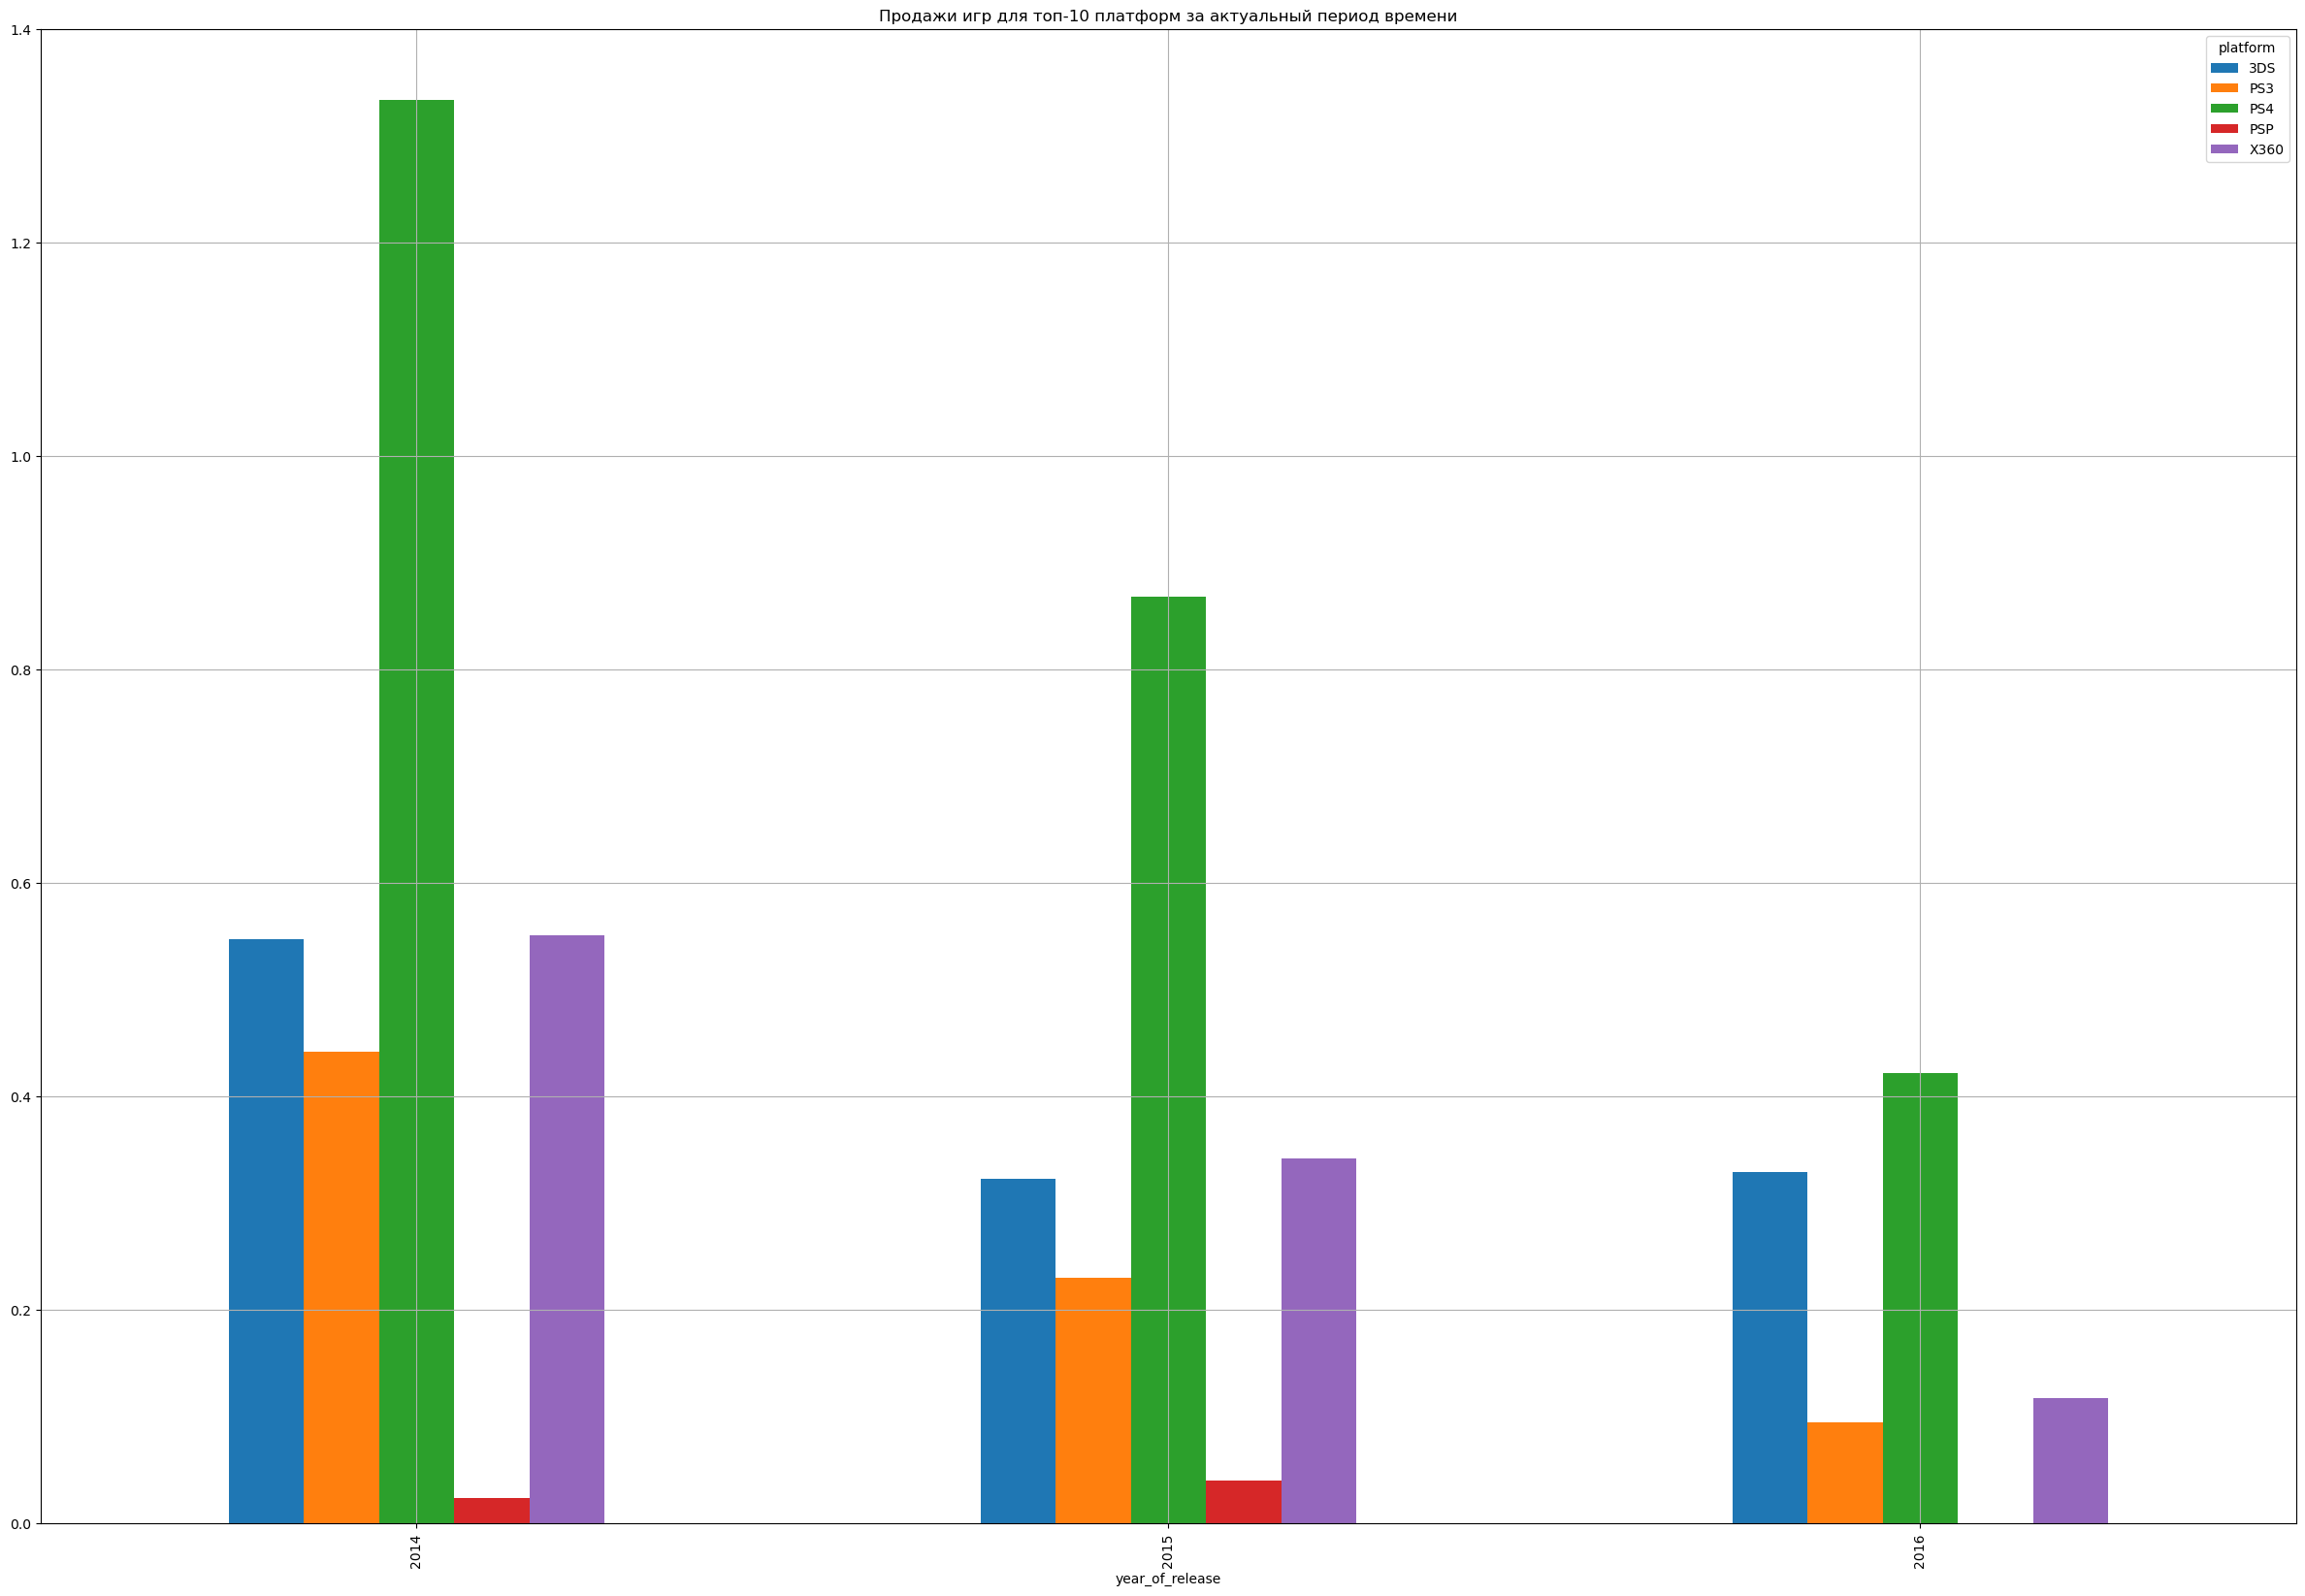

In [44]:
res_top_sales_plat_per_year.plot(kind='bar',grid=True, figsize=(30, 20)).set_title('Продажи игр для топ-10 платформ за актуальный период времени')

Text(0.5, 1.0, 'Продажи игр для топ-10 платформ за актуальный период времени')

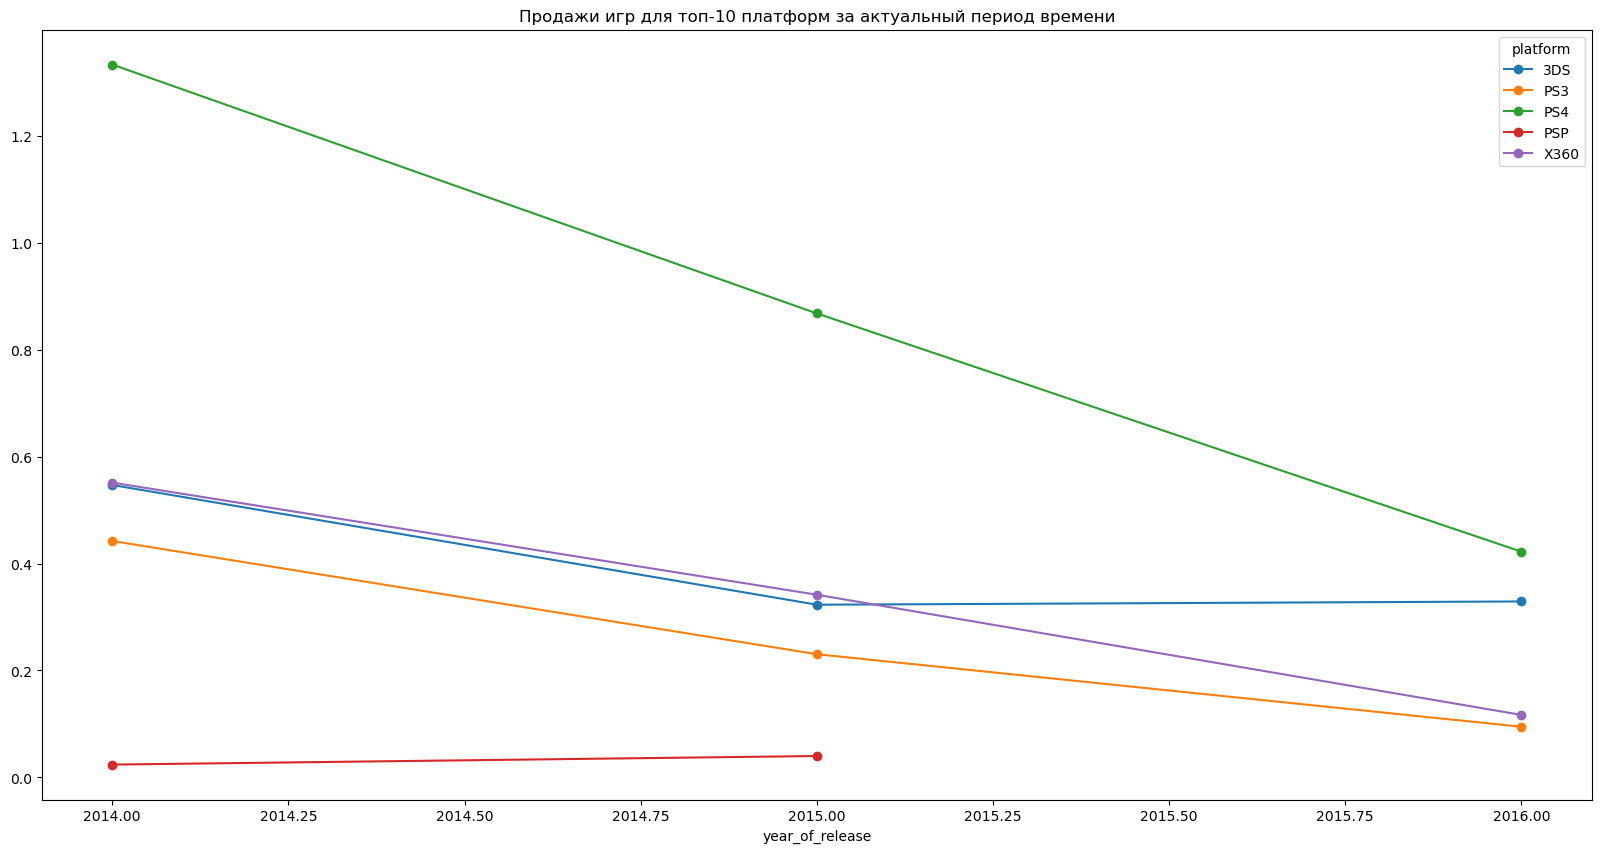

In [45]:
res_top_sales_plat_per_year.plot(style='o-', figsize=(20, 10)).set_title('Продажи игр для топ-10 платформ за актуальный период времени')

<div class="alert alert-info">
Определил актуальный период, который составит 3 года.
    
В связи с этим отразим следующие выводы:
1.  Больше всего игр было куплено для платформы PS4 в 2014 году. Продажи игр для этой платформы был успешен по сравнению с другими платформами. При этом продажи игр для PS4 пошли на спад. 
2. Чаще всего чем старше платформа, тем меньше игр для нее продано
3. Худшие результаты в 2016 году показали платформы  PS3 и X360. Перспективы на следующий год кажутся не самыми позитивными. Предположим, что эпоха данных игровых платформ заканчивается, устройства устаревают. Поэтому пользователи переходят на новые версии игровых платформ.
4. Можем выделить две перспективные платформы на 2017 год: Платформа PS4 и платформа 3DS. Что касается PS4, то эта новая и современная платформа. Важной деталью является то, что несмотря на падение в показателях остается одной из самых пополярных игровых платформ, поэтому даже при падении объем продаж показатели выглядят хорошо и перспективно. Конкурент - платформа 3DS выделяется тем, что при общем спаде продаж в 2016 году, платформа смогла увеличить показатели.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

In [46]:
good_data = data.query('year_of_release > 2013').query('platform in @top_sales_plat_list') 
# Отобрали данные по году выпуска игры и топ-10 популярных платформ

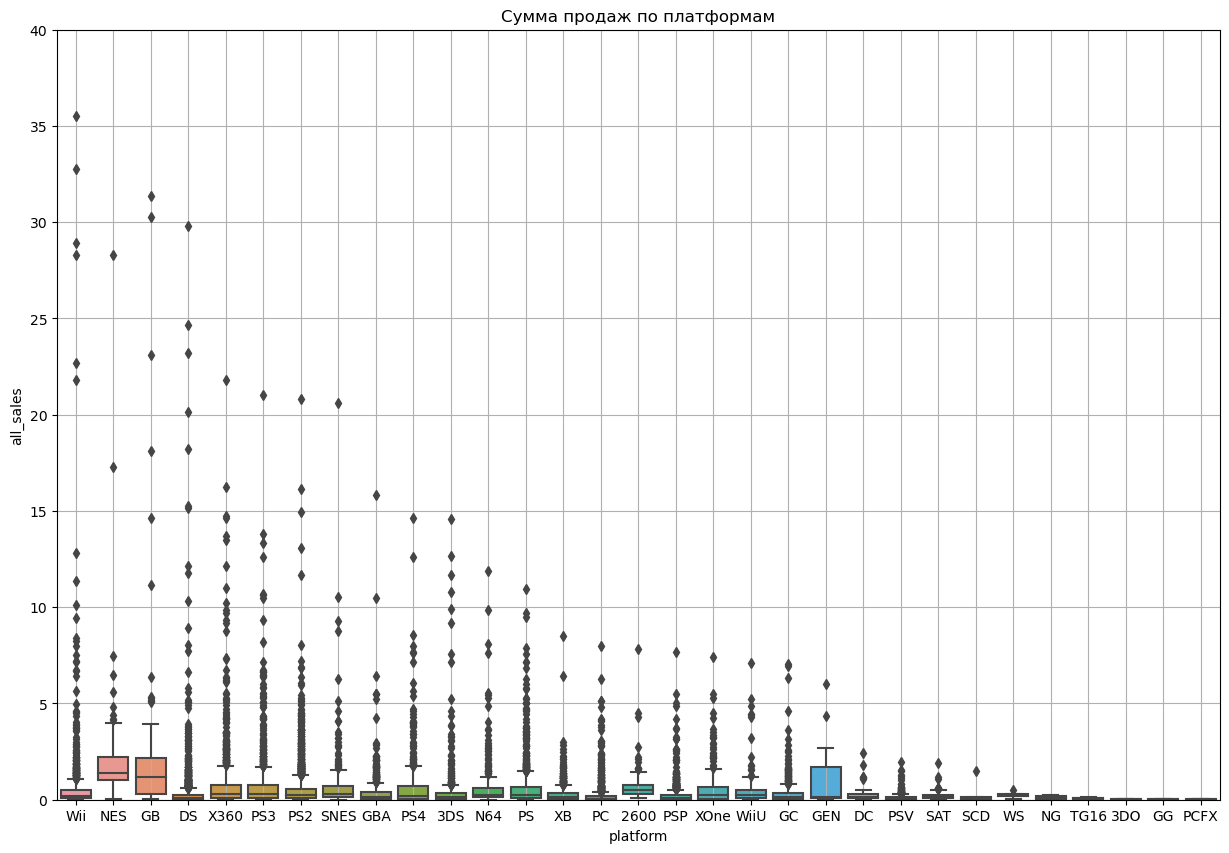

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot( x=data['platform'], y=data['all_sales'])
plt.ylim(0,40)
plt.grid(True)
plt.title('Сумма продаж по платформам')
plt.show()

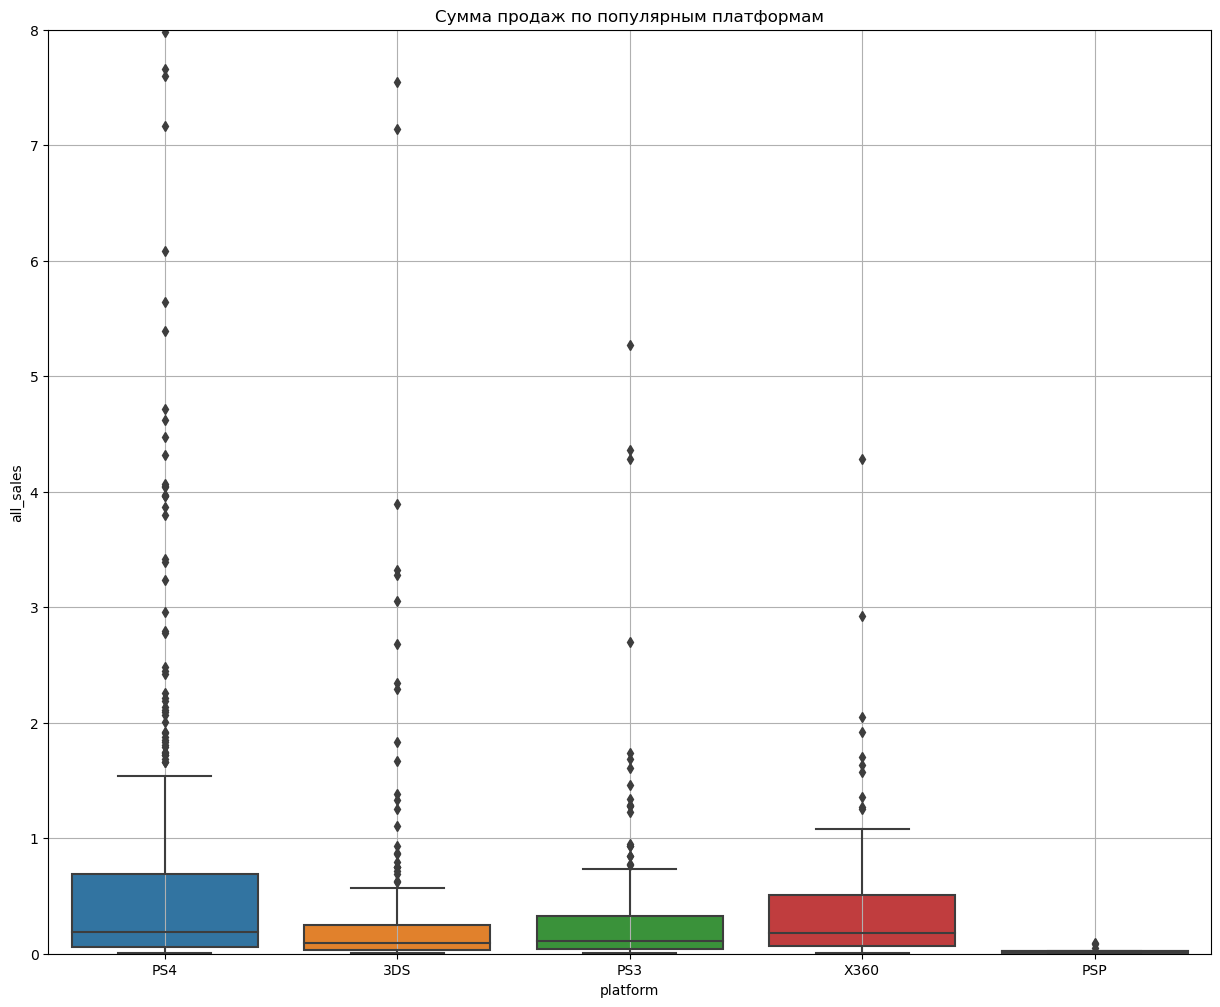

In [48]:
plt.figure(figsize=(15,12))
sns.boxplot( x=good_data['platform'], y=good_data['all_sales'])
plt.ylim(0,8)
plt.grid(True)
plt.title('Сумма продаж по популярным платформам')
plt.show()

<div class="alert alert-info">
    
Вывод:
 - Видим, что больше всего было продано игр для таких платформ как: X360, PS4, PS3.
 - По каждой игровой платформе видим значения, которые отметаются верхними усами.
 - Медиана приближена к нижнему "усу", то есть к 1ой квартилии.
 - Количество платформ по актуальному периоду уменьшилось с 10 до 5. 
    


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Возьмем самую перспективную и популярную за последние года платформу PS4. 

In [49]:
PS4_data = data.query('platform == "PS4"')
PS4_data = PS4_data.query('user_score != "unknown"')

In [50]:
PS4_data['user_score'] = PS4_data['user_score'].astype(float)

In [51]:
PS4_data['critic_score'].corr(PS4_data['all_sales'])

0.35193310929901417

Text(0.5, 1.0, 'Продажи по платформе PS4 в зависимости от оценки критиков')

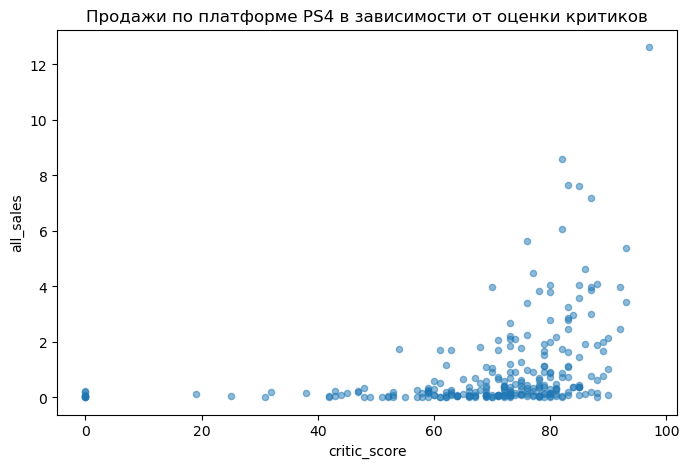

In [52]:
PS4_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи по платформе PS4 в зависимости от оценки критиков')

In [53]:
PS4_data['user_score'].corr(PS4_data['all_sales'])

-0.03195711020455644

Text(0.5, 1.0, 'Продажи по платформе PS4 в зависимости от оценки пользователей')

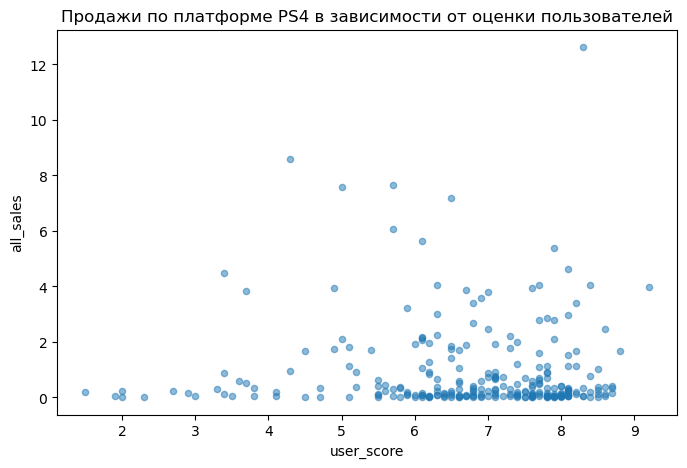

In [54]:
PS4_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи по платформе PS4 в зависимости от оценки пользователей')

Вывод:
1. Корреляция между оценками и продажами очень низкая.
2. Видим на графиках, что на объем продаж чуть больше влияет оценка критиков.  
3. При оценке критиков 60-80 больше всего продаж, по оценке пользователей 6-8 больше всего продаж.
4. Продажи по оценкам критиков распределены более равномерно. Высокая оценка - больше проданных копий. Продажи по оценкам пользователей хаотичнее, то есть менее зависимы от оценки игроков. 
5. Наблюдаем как игры с оценкой 0, так и с высоской оценкой, которая больше 90 или 9 соответственно. 


Соотнесем выводы с продажами игр на других платформах.

Выберем менее популярный платформы и соотнесем их - PS3, X360

In [55]:
PS3_data = data.query('platform == "PS3"')

In [56]:
PS3_data['critic_score'].corr(PS3_data['all_sales'])
# Находим корреляцию

0.35514556594230795

In [57]:
PS3_data = PS4_data.query('user_score != "unknown"')
PS3_data['user_score'].corr(PS3_data['all_sales'])

-0.03195711020455644

Text(0.5, 1.0, 'Продажи игр для PS3 в зависимости от оценки критиков')

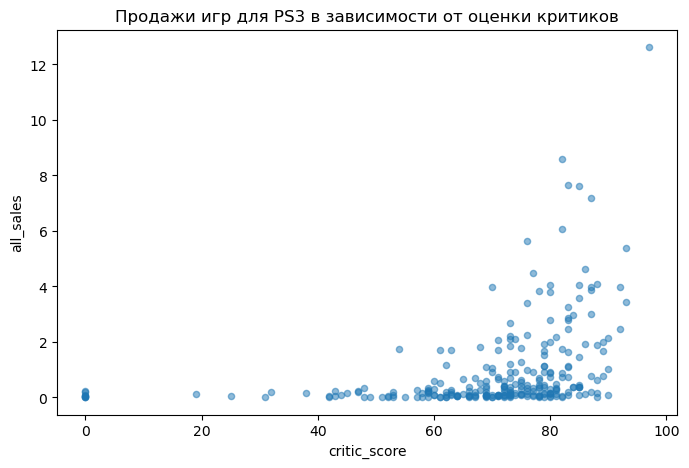

In [58]:
PS3_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для PS3 в зависимости от оценки критиков')

Text(0.5, 1.0, 'Продажи игр для PS3 в зависимости от оценки пользователей')

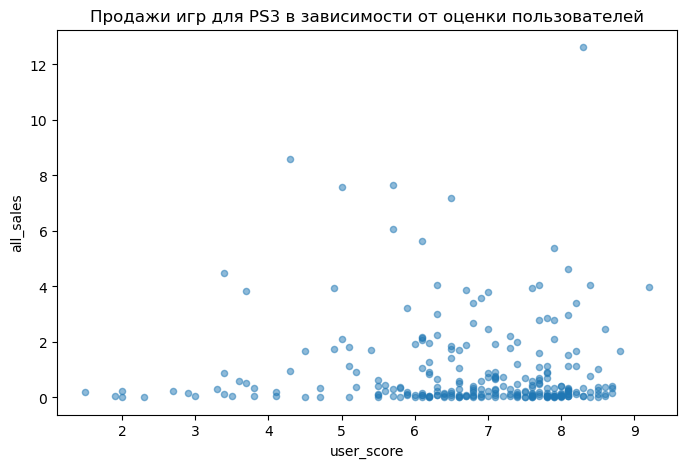

In [59]:
PS3_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для PS3 в зависимости от оценки пользователей') 

------------------------------------------------------------------------------------------------------------------------------

In [60]:
X360_data = data.query('platform == "X360"')

In [61]:
X360_data['critic_score'].corr(X360_data['all_sales'])

0.31175625162016884

In [62]:
X360_data = PS4_data.query('user_score != "unknown"')
X360_data['user_score'].corr(X360_data['all_sales'])

-0.03195711020455644

Text(0.5, 1.0, 'Продажи игр для X360 в зависимости от оценки критиков')

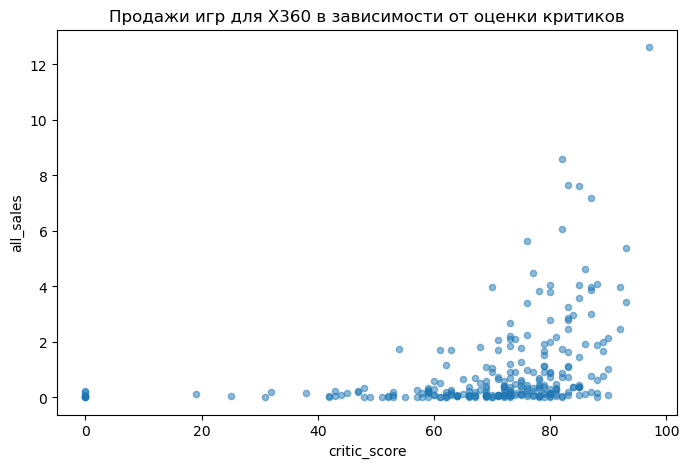

In [63]:
X360_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для X360 в зависимости от оценки критиков')  

Text(0.5, 1.0, 'Продажи игр для X360 в зависимости от оценки пользователей')

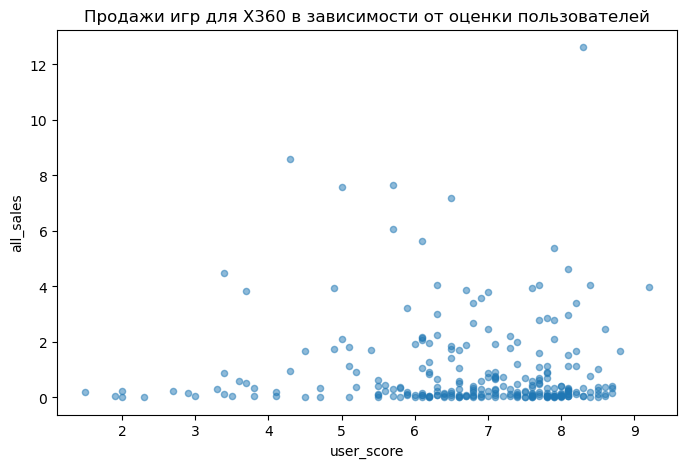

In [64]:
X360_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для X360 в зависимости от оценки пользователей')

-------------------------------------------------------------------------------------------------------------------------------

In [65]:
PS_data = data.query('platform == "PS"')

In [66]:
PS_data['critic_score'].corr(PS_data['all_sales'])

0.31280484079126164

In [67]:
PS_data = PS4_data.query('user_score != "unknown"')
PS_data['user_score'].corr(PS_data['all_sales'])

-0.03195711020455644

Вывод:
1. Подтверждается тот факт, что оценки критиков больше влияют на продажи, чем оценки игроков. 
2. Кроме продаж игр на платформу PS2, оценки игроков практически не имеют влияния.
3. Корреляция продаж к оценке критиков стабильна по всем платформам и составляет 30-35%.
4. Графики по самым популярным платформам почти идентичны.
5. У каждой платформы есть игры с оценками 0, которые были проданы. Особенно таких игр много было продано для платформы PS2.

<div class="alert alert-info">
Отдельно ниже разберем и сделаем вывод по платформам PS4, X360, PS3


In [68]:
good_data_PS4 = PS4_data.query('year_of_release > 2013')


In [69]:
good_data_PS4['critic_score'].corr(good_data_PS4['all_sales'])

0.3414035619160803

Text(0.5, 1.0, 'Продажи по платформе PS4 в зависимости от оценки критиков за актуальный период')

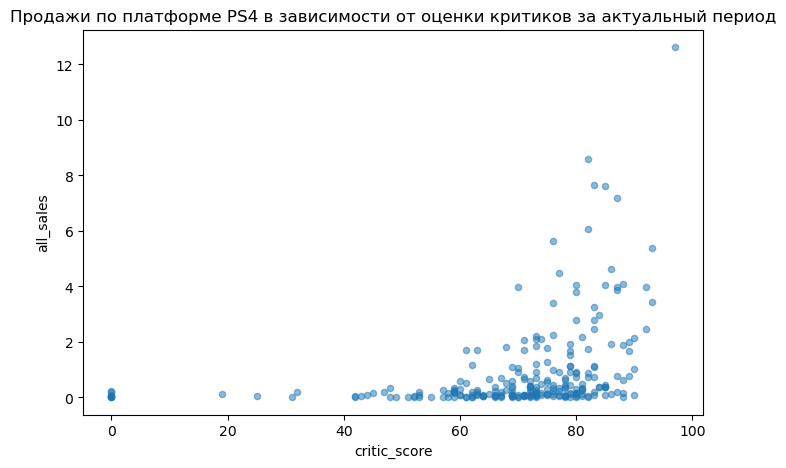

In [70]:
good_data_PS4.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи по платформе PS4 в зависимости от оценки критиков за актуальный период')

In [71]:
good_data_PS4['user_score'].corr(good_data_PS4['all_sales'])

-0.040131589472697286

Text(0.5, 1.0, 'Продажи по платформе PS4 в зависимости от оценки пользователей за актуальный период')

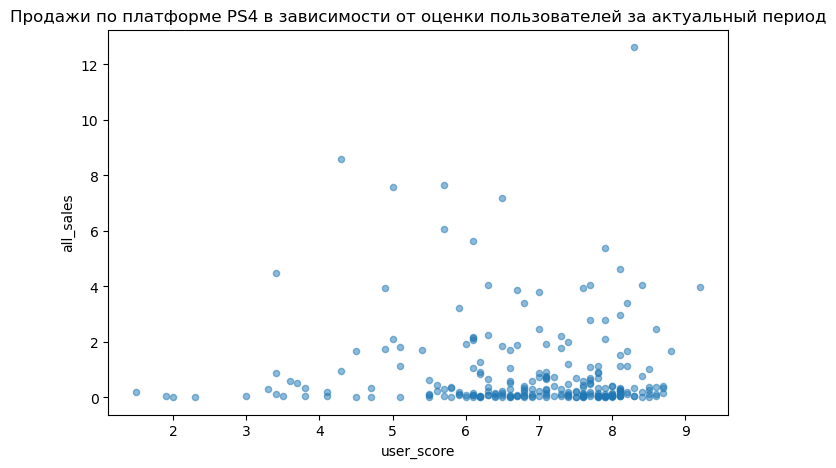

In [72]:
good_data_PS4.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи по платформе PS4 в зависимости от оценки пользователей за актуальный период')

Промежуточный Вывод:
1. Корреляция между оценками критиков высокая, между оценками пользователей - низкая
2. При оценке критиков 59-82 больше всего продаж, по оценке пользователей 6-8 больше всего продаж.
3. Продажи по оценкам критиков распределены более равномерно. Высокая оценка - больше проданных копий. Продажи по оценкам пользователей хаотичнее, то есть менее зависимы от оценки игроков. 
4. Наблюдаем как игры с оценкой 0, так и с высоской оценкой, которая больше 90 или 9 соответственно. 

In [73]:
PS3_good_data = PS3_data.query('year_of_release > 2013')

In [74]:
PS3_good_data['critic_score'].corr(PS3_good_data['all_sales'])

0.3414035619160803

Text(0.5, 1.0, 'Продажи игр для PS3 в зависимости от оценки критиков за актуальный период')

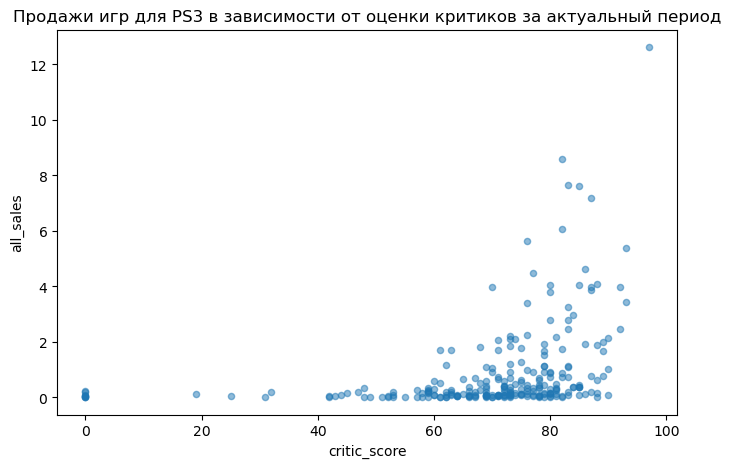

In [75]:
PS3_good_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для PS3 в зависимости от оценки критиков за актуальный период')

In [76]:
PS3_good_data['user_score'].corr(PS3_good_data['all_sales'])

-0.040131589472697286

Text(0.5, 1.0, 'Продажи игр для PS3 в зависимости от оценки пользователей за актуальный период')

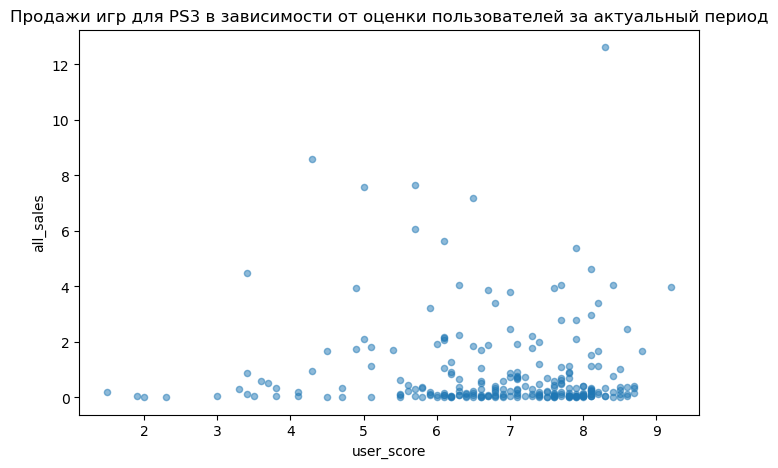

In [77]:
PS3_good_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для PS3 в зависимости от оценки пользователей за актуальный период') 

In [78]:
X360_good_data = X360_data.query('year_of_release > 2013')

In [79]:
X360_good_data['critic_score'].corr(X360_good_data['all_sales'])

0.3414035619160803

Text(0.5, 1.0, 'Продажи игр для X360 в зависимости от оценки критиков за актуальный период')

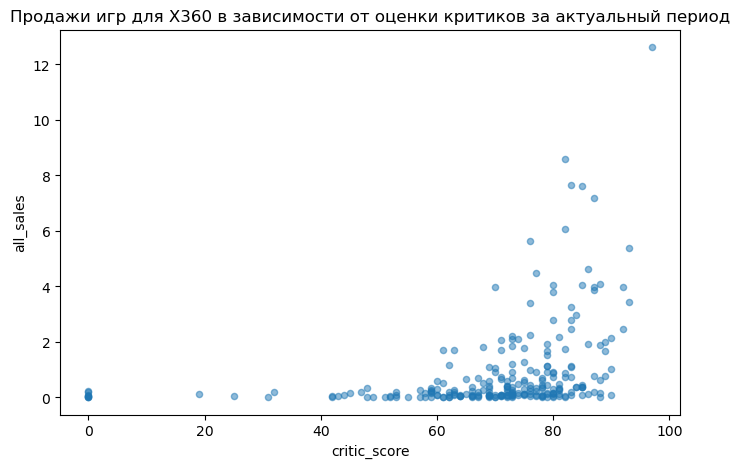

In [80]:
X360_good_data.plot(x='critic_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для X360 в зависимости от оценки критиков за актуальный период')  

In [81]:
X360_good_data['user_score'].corr(X360_good_data['all_sales'])

-0.040131589472697286

Text(0.5, 1.0, 'Продажи игр для X360 в зависимости от оценки пользователей за актуальный период')

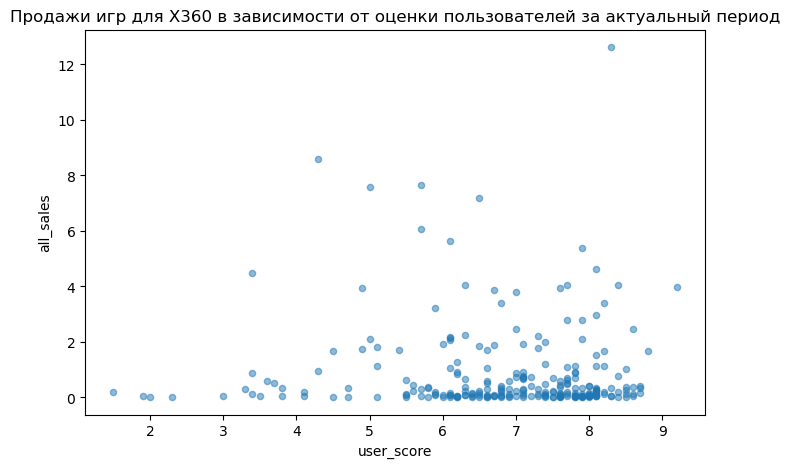

In [82]:
X360_good_data.plot(x='user_score', y='all_sales', kind='scatter', alpha=0.5, figsize=(8,5)).set_title('Продажи игр для X360 в зависимости от оценки пользователей за актуальный период')

Вывод:
1. Подтверждается тот факт, что оценки критиков больше влияют на продажи, чем оценки игроков.    
2. Оценки игроков практически не имеют влияния, так как показатель корреляции низкий. 
3. Корреляция продаж к оценке критиков стабильна по всем платформам и составляет 34%.
4. Анализируемые показатели по самым популярным платформам почти идентичны.
5. У каждой платформы есть игры с низкими оценками 0 и очень высокими.

--------------------------------------------------------------------------------------------------------------------------------

Посмотрим на общее распределение игр по жанрам. 

In [83]:
genre_sales = data.groupby('genre')['all_sales'].agg(['count', 'sum'])  
# Сгрупировали данные по жанрам

In [84]:
genre_sales.columns = ['Количество игр', 'Сумма продаж']

In [85]:
genre_sales.sort_values(by='Количество игр', ascending=False)

,Количество игр,Сумма продаж
genre,,
Action,3307,1716.52
Sports,2306,1309.67
Misc,1721,790.29
Role-Playing,1481,931.08
Shooter,1296,1041.36
Adventure,1293,233.33
Racing,1226,723.49
Platform,878,825.55
Simulation,857,387.96


In [86]:
genre_sales.sort_values(by='Сумма продаж', ascending=False)

,Количество игр,Сумма продаж
genre,,
Action,3307,1716.52
Sports,2306,1309.67
Shooter,1296,1041.36
Role-Playing,1481,931.08
Platform,878,825.55
Misc,1721,790.29
Racing,1226,723.49
Fighting,837,442.66
Simulation,857,387.96


Text(0.5, 1.0, 'Продажи по жанрам')

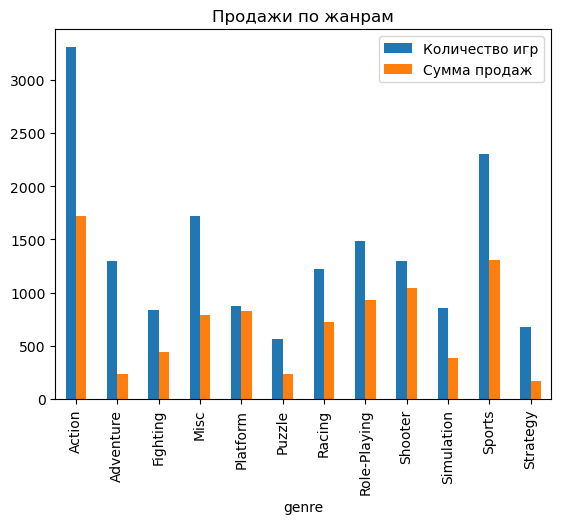

In [87]:
genre_sales.plot(kind="bar").set_title('Продажи по жанрам')

In [88]:
genre_sales.describe()

,Количество игр,Сумма продаж
count,12.000000,12.000000
mean,1370.333333,734.530833
std,781.168045,472.551171
min,569.000000,172.570000
25%,852.000000,350.942500
50%,1259.500000,756.890000
75%,1541.000000,958.650000
max,3307.000000,1716.520000


Вывод:
1. Больше всего игр было в жанре Action. Логично, что больше всего было продано игр также в жанре Action. 
2. Чаще всего выпускали игры с жанрами Action, Sports, Misc.
3. По сумме продаж лидируют следующие жанры игр: Action, Sports, Shooter. Они являются самыми прибыльными жанрами.
4. Меньше всего было выпущено игр в жанре: Puzzle, Strategy, Fighting, Simulation, Platform
5. Самые низкие результаты продаж показали игры в жанрах: Strategy, Adventure, Puzzle. 
6. Чем больше игр в определенном жанре выпущено, тем больше пользователей приобретало таких игр. Видимо, разработчики выпускают игры в тех жанрах, которые наиболее популярны у пользователей. Такими жанрами являются: Action, Sports.


In [89]:
nice_data = data.query('year_of_release > 2013')
good_genre_sales = data.groupby('genre')['all_sales'].agg(['count', 'sum', 'median'])  

In [90]:
good_genre_sales.columns = ['Количество игр', 'Сумма продаж', 'Медиана']

In [91]:
good_genre_sales.sort_values(by='Количество игр', ascending=False)

,Количество игр,Сумма продаж,Медиана
genre,,,
Action,3307,1716.52,0.19
Sports,2306,1309.67,0.22
Misc,1721,790.29,0.16
Role-Playing,1481,931.08,0.18
Shooter,1296,1041.36,0.24
Adventure,1293,233.33,0.05
Racing,1226,723.49,0.19
Platform,878,825.55,0.27
Simulation,857,387.96,0.15


In [92]:
good_genre_sales.describe()

,Количество игр,Сумма продаж,Медиана
count,12.000000,12.000000,12.000000
mean,1370.333333,734.530833,0.171667
std,781.168045,472.551171,0.063652
min,569.000000,172.570000,0.050000
25%,852.000000,350.942500,0.137500
50%,1259.500000,756.890000,0.185000
75%,1541.000000,958.650000,0.212500
max,3307.000000,1716.520000,0.270000


Вывод:
1. Больше всего игр было выпущено в жанре Action. Логично, что больше всего было продано игр также в жанре Action. 
2. Чаще всего выпускали игры с жанрами Action, Sports, Misc.
3. По сумме продаж лидируют следующие жанры игр: Action, Sports, Shooter.
4. Меньше всего было выпущено игр в жанре: Puzzle, Strategy, Fighting, Simulation, Platform.
5. Самые низкие результаты продаж показали игры в жанрах: Strategy, Adventure, Puzzle. 
6. В среднем игра в жанре Platform была продана на 0.94 млн копий. Медиана составляет 0.27 млн. копий. Это самый большой результат.
7. В среднем игра в жанре Adventure была продана на 0.18 млн копий. Медиана составляет 0.05 млн. копий. Это самый худший результат продаж.

--------------------------------------------------------------------------------------------------------------------------------

Определим для пользователя каждого региона (NA, EU, JP):

Самые популярные платформы (топ-5).

Самые популярные жанры (топ-5).

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [93]:
na_plat = data.groupby('platform')['na_sales'].agg(['sum']) 
na_plat.sort_values(by='sum', ascending=False).head(5)
# Сгупировали данные по продажам в определенном регионе и отсротировали их по убыванию

,sum
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31


<AxesSubplot:xlabel='platform'>

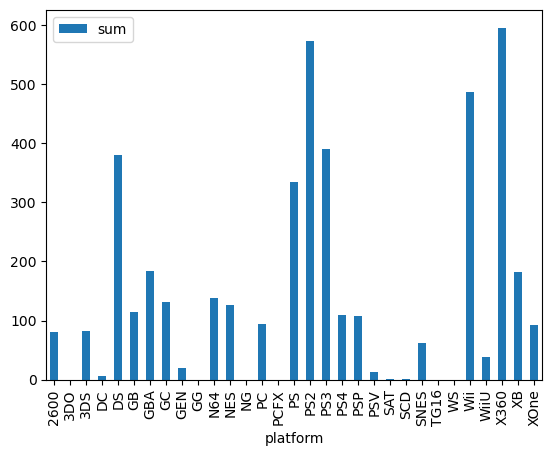

In [94]:
na_plat.plot(kind="bar")

In [95]:
na_genre = data.groupby('genre')['na_sales'].agg(['sum']).head(5)
na_genre.sort_values(by='sum', ascending=False).head(5)

,sum
genre,
Action,863.17
Platform,444.44
Misc,399.57
Fighting,220.51
Adventure,101.52


<AxesSubplot:xlabel='genre'>

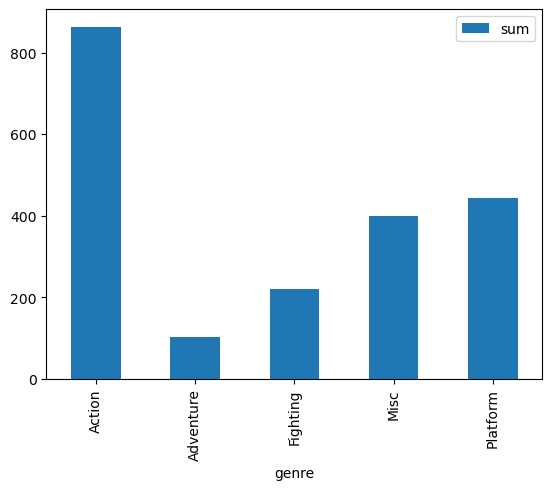

In [96]:
na_genre.plot(kind="bar")

In [97]:
na_rating = data.groupby('rating')['na_sales'].agg(['sum'])
na_rating.sort_values(by='sum', ascending=False).head(5)

,sum
rating,
E,1274.24
T,747.60
M,742.89
E10+,345.50
K-A,2.56


<AxesSubplot:xlabel='rating'>

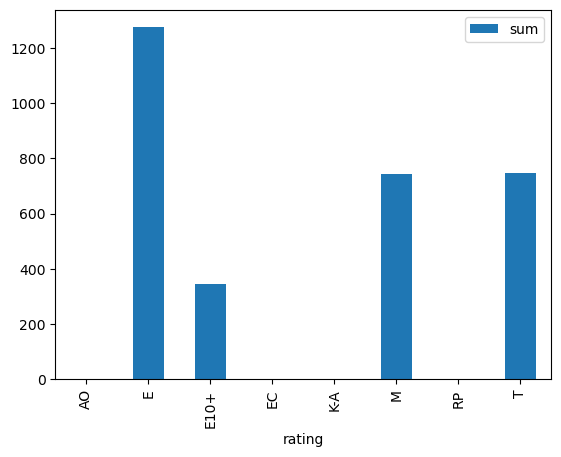

In [98]:
na_rating.plot(kind="bar")

Промежуточный вывод для пользователей NA:
1. Самые популярные платформы, для которых было продано больше всего копий игр: X360, PS2, Wii, PS3, DS. 
2. Разница между двумя самыми пополярными и двумя менее популярными платформами среди топ-5 мнебольшая. Wii расположилась ровно по середине между остальными платформами. 
3. Самыми популярными жанрами оказались: Action, Platform, Misc, Fighting, Adventure.  	 
4. Жанр Action уверено лидирует среди остальных жанров игр. Он превосходит второе и третье место ~ в 2 раза.
5. Можем предположить, что рейтинг ESRB влияет на продажи, так как пользователи в этом регионе чаще приобретали игры с рейтингом Е, Т, М, E10+, K-A. При этом основную часть продаж составили игры с рейтингом Е, Т, М, E10+. 
6. Наблюдаем большой отрыв в продажах игр с рейтингом Е. 

--------------------------------------------------------------------------------------------------------------------------------

In [99]:
eu_plat = data.groupby('platform')['eu_sales'].agg(['sum']) 
eu_plat.sort_values(by='sum', ascending=False).head(5)

,sum
platform,
PS2,332.63
PS3,327.21
X360,268.32
Wii,258.32
PS,212.39


<AxesSubplot:xlabel='platform'>

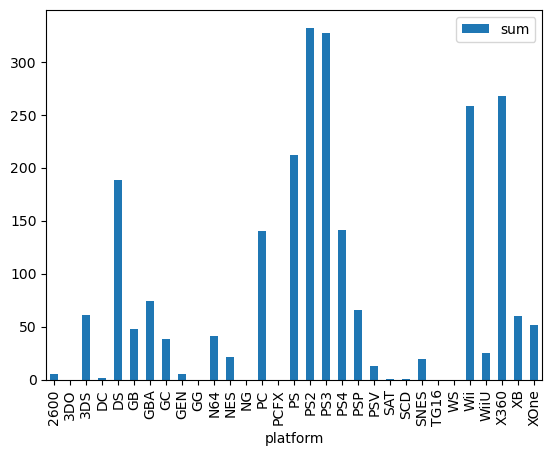

In [100]:
eu_plat.plot(kind="bar")

In [101]:
eu_genre = data.groupby('genre')['eu_sales'].agg(['sum']).head(5)
eu_genre.sort_values(by='sum', ascending=False).head(5)

,sum
genre,
Action,510.99
Misc,210.60
Platform,199.39
Fighting,99.00
Adventure,63.20


<AxesSubplot:xlabel='genre'>

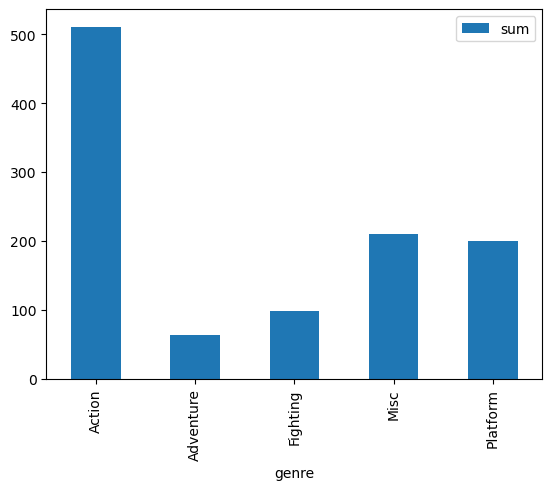

In [102]:
eu_genre.plot(kind="bar")

In [103]:
eu_rating = data.groupby('rating')['eu_sales'].agg(['sum'])
eu_rating.sort_values(by='sum', ascending=False).head(5)

,sum
rating,
E,703.87
M,480.00
T,421.79
E10+,183.35
AO,0.61


<AxesSubplot:xlabel='rating'>

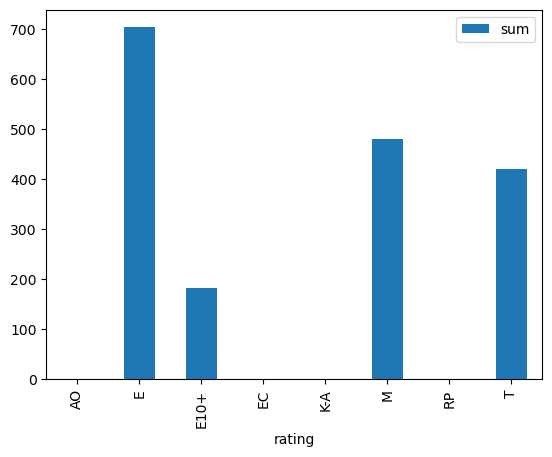

In [104]:
eu_rating.plot(kind="bar")

Промежуточный вывод для пользователей EU:
1. Самые популярные платформы, для которых было продано больше всего копий игр: PS2, PS3, X360, Wii, PS.
2. Пользователи в этом регионе не отдают предпочтение какой-то одной платформе. Продажи распределены почти равномерно по всем топ-5 платформам. При этом игры для PS2 имеют больший объем продаж
3. Самыми популярными жанрами оказались: Action, Misc, Platform, Fighting, Adventure. При этом жанр Action наиболее пополуярный. Игры с этим жанром продавались в 2,5 раза больше, чем близжайший преследователь в лице Misc. 
4. Наблюдаем большой отрыв в продажах игр с рейтингом Е. Также часто продавались игры с рейтингом М и Т. 
5. Можем предположить, что рейтинг ESRB влияет на продажи, так как пользователи в этом регионе в основном приобретали игры с рейтингом Е, М, Т, E10+. 

--------------------------------------------------------------------------------------------------------------------------------

In [105]:
jp_plat = data.groupby('platform')['jp_sales'].agg(['sum']) 
jp_plat.sort_values(by='sum', ascending=False).head(5)

,sum
platform,
DS,175.02
PS,139.78
PS2,137.54
SNES,116.55
3DS,100.62


<AxesSubplot:xlabel='platform'>

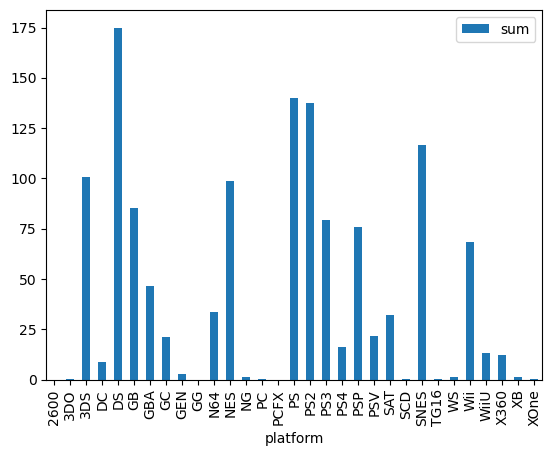

In [106]:
jp_plat.plot(kind="bar")

In [107]:
jp_genre = data.groupby('genre')['jp_sales'].agg(['sum']).head(5)
jp_genre.sort_values(by='sum', ascending=False).head(5)

,sum
genre,
Action,160.14
Platform,130.71
Misc,107.02
Fighting,87.28
Adventure,52.24


<AxesSubplot:xlabel='genre'>

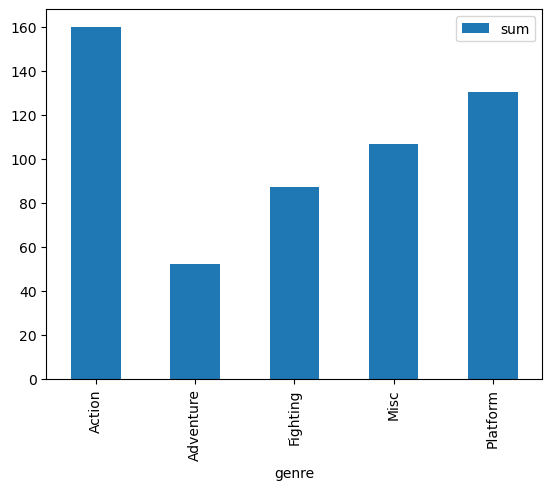

In [108]:
jp_genre.plot(kind="bar")

In [109]:
jp_rating = data.groupby('rating')['jp_sales'].agg(['sum'])
jp_rating.sort_values(by='sum', ascending=False).head(5)

,sum
rating,
E,197.96
T,150.70
M,63.58
E10+,40.20
K-A,1.46


<AxesSubplot:xlabel='rating'>

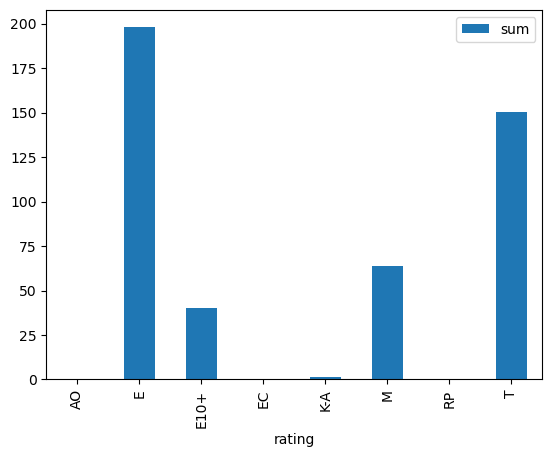

In [110]:
jp_rating.plot(kind="bar")

Промежуточный вывод для пользователей JP:
1. Самые популярные платформы, для которых было продано больше всего копий игр: DS, PS, PS2, SNES, 3DS.
2. Пользователи в этом регионе не отдают предпочтение какой-то одной платформе. Продажи распределены почти равномерно по всем топ-5 платформам. При этом игры для DS имеют больший объем продаж.
3. Самыми популярными жанрами оказались: Action, Platform, Misc, Fighting, Adventure. При этом жанр Action наиболее популярный. При этом нельзя сказать, что какой-либо жанр имеет выдающиеся результаты в области продаж.
4. Наблюдаем небольшой отрыв в продажах игр с рейтингом Е. Также часто продавались игры с рейтингом Т, М и E10+.
5. Можем предположить, что рейтинг ESRB влияет на продажи, так как пользователи в этом регионе в основном приобретали игры с рейтингом Е, Т, М, E10+.

In [111]:
nice_data.loc[nice_data['rating'].isna(), 'rating'] = 'unknown'

In [112]:
# nice_data = data.query('year_of_release > 2013')

good_na_plat = nice_data.groupby('platform')['na_sales'].agg(['sum']) 
good_na_plat.sort_values(by='sum', ascending=False).head(5)

,sum
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Text(0.5, 1.0, 'Продажи игр по платформам в Америке')

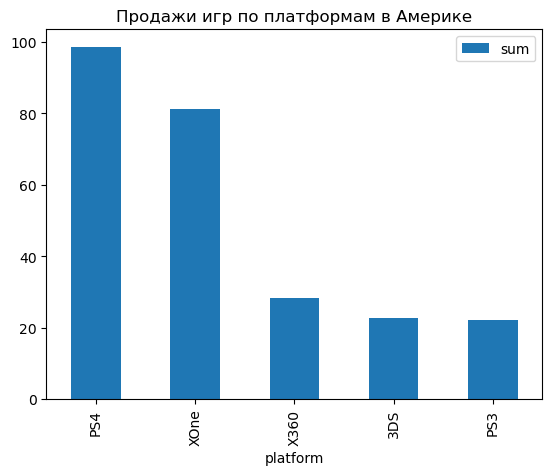

In [113]:
# good_na_plat.plot(kind="bar").set_title("Продажи игр по платформам в Америке")
good_na_plat.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи игр по платформам в Америке")

In [114]:
good_na_genre = nice_data.groupby('genre')['na_sales'].agg(['sum']).head(5)
good_na_genre.sort_values(by='sum', ascending=False).head(5)

,sum
genre,
Action,72.53
Misc,15.05
Fighting,12.43
Platform,6.79
Adventure,5.64


Text(0.5, 1.0, 'Продажи игр по жанрам в Америке')

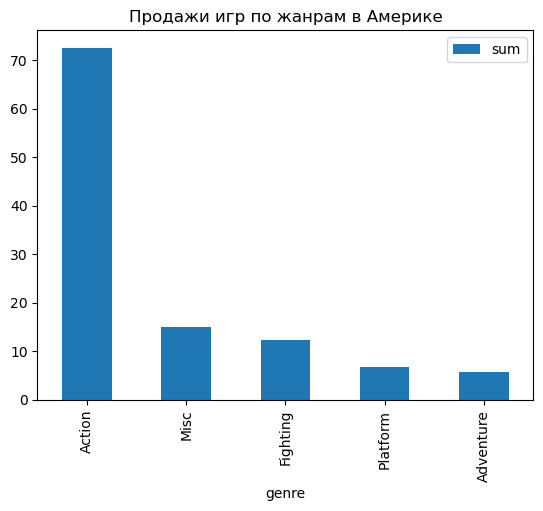

In [115]:
# good_na_genre.plot(kind="bar").set_title("Продажи игр по жанрам в Америке")
good_na_genre.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи игр по жанрам в Америке")

In [116]:
good_na_rating = nice_data.groupby('rating')['na_sales'].agg(['sum'])
good_na_rating.sort_values(by='sum', ascending=False).head(5)

,sum
rating,
M,96.42
unknown,64.72
E,50.74
T,38.95
E10+,33.23


Text(0.5, 1.0, 'Продажи игр по рейтингу в Америке')

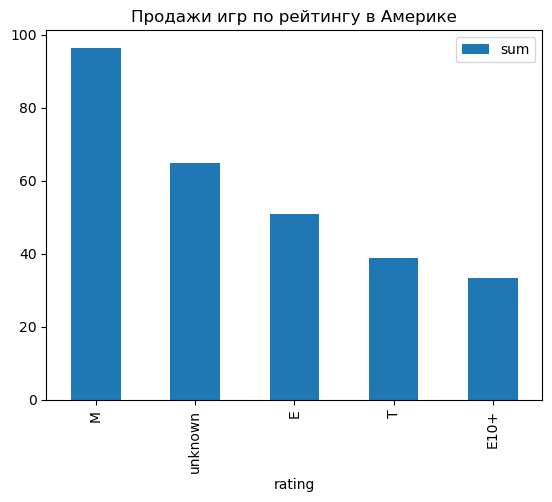

In [117]:
# good_na_rating.plot(kind="bar").set_title("Продажи игр по рейтингу в Америке")
good_na_rating.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи игр по рейтингу в Америке")

Промежуточный вывод для пользователей NA:
1. Самые популярные платформы - PS4 Xone
2. Самый популярный жанр - Action
3. Жанр Action уверено лидирует среди остальных жанров игр. Он превосходит второе и третье место ~ в 5 раз.
5. Можем предположить, что рейтинг ESRB влияет на продажи, так как пользователи в этом регионе чаще приобретали игры с рейтингом M.

In [118]:
good_eu_plat = nice_data.groupby('platform')['eu_sales'].agg(['sum']) 
good_eu_plat.sort_values(by='sum', ascending=False).head(5)

,sum
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


Text(0.5, 1.0, 'Продажи по платформам в Европе')

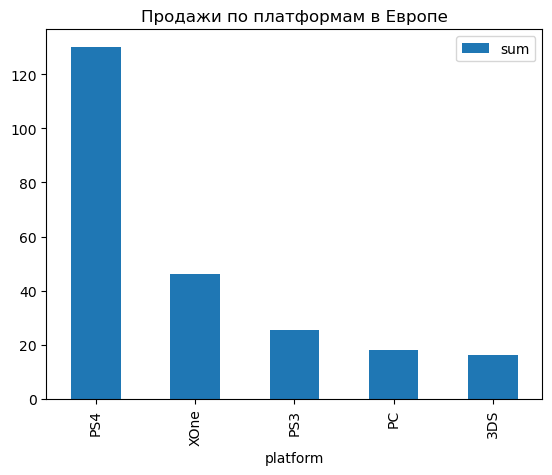

In [119]:
# good_eu_plat.plot(kind="bar").set_title("Продажи по платформам в Европе")
good_eu_plat.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи по платформам в Европе")

In [120]:
good_eu_genre = nice_data.groupby('genre')['eu_sales'].agg(['sum']).head(5)
good_eu_genre.sort_values(by='sum', ascending=False).head(5)

,sum
genre,
Action,74.68
Misc,12.86
Platform,6.80
Fighting,6.69
Adventure,6.49


Text(0.5, 1.0, 'Продажи игр по жанрам в Европе')

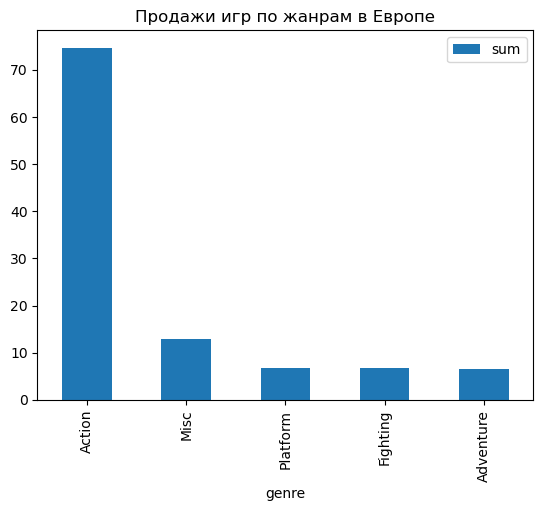

In [121]:
# good_eu_genre.plot(kind="bar").set_title("Продажи игр по жанрам в Европе")
good_eu_genre.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи игр по жанрам в Европе")

In [122]:
good_eu_rating = nice_data.groupby('rating')['eu_sales'].agg(['sum'])
good_eu_rating.sort_values(by='sum', ascending=False).head(5)

,sum
rating,
M,93.44
unknown,58.95
E,58.06
T,34.07
E10+,26.16


Text(0.5, 1.0, 'Продажи игр по рейтингу в Европе')

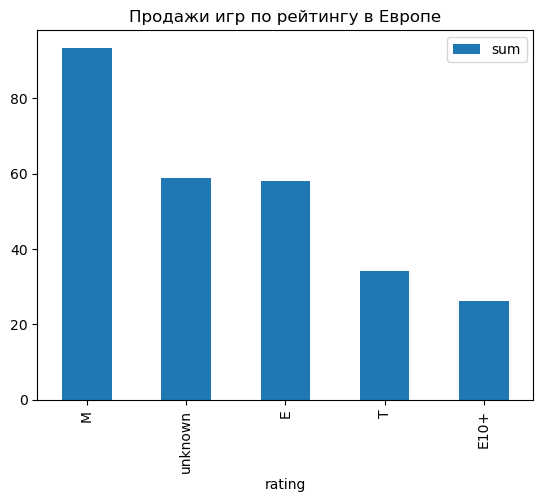

In [123]:
# good_eu_rating.plot(kind="bar").set_title("Продажи игр по рейтингу в Европе")
good_eu_rating.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи игр по рейтингу в Европе")

Промежуточный вывод для пользователей EU:
1. Самая популярная платформа - PS4.
2. Самый популярный жанр - Action
3. Жанр Action уверено лидирует среди остальных жанров игр. Он превосходит второе и третье место ~ в 5 раз.
4. Можем предположить, что рейтинг ESRB влияет на продажи, так как пользователи в этом регионе чаще приобретали игры с рейтингом M.

In [124]:
good_jp_plat = nice_data.groupby('platform')['jp_sales'].agg(['sum']) 
good_jp_plat.sort_values(by='sum', ascending=False).head(5)

,sum
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Text(0.5, 1.0, 'Продажи по платформам в Японии')

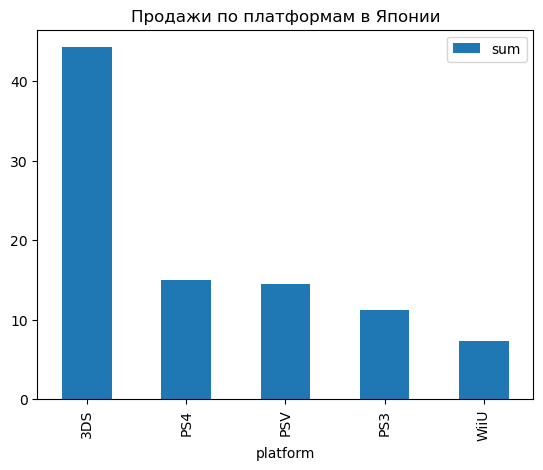

In [125]:
# good_jp_plat.plot(kind="bar").set_title("Продажи по платформам в Японии")
good_jp_plat.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи по платформам в Японии")

In [126]:
good_jp_genre = nice_data.groupby('genre')['jp_sales'].agg(['sum']).head(5)
good_jp_genre.sort_values(by='sum', ascending=False).head(5)

,sum
genre,
Action,29.58
Fighting,6.37
Misc,5.61
Adventure,3.60
Platform,2.69


Text(0.5, 1.0, 'Продажи игр по жанрам в Японии')

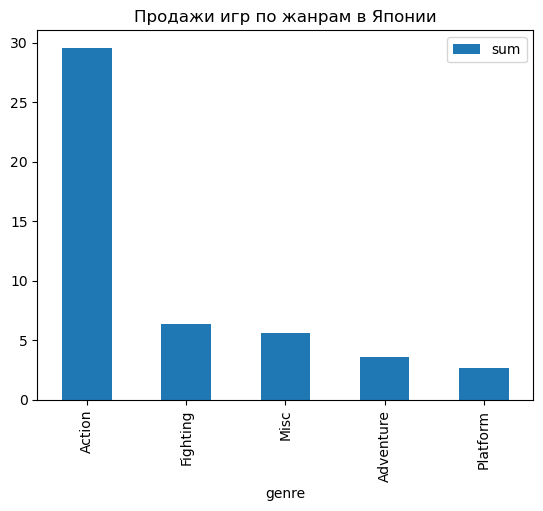

In [127]:
# good_jp_genre.plot(kind="bar").set_title("Продажи игр по жанрам в Японии")
good_jp_genre.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи игр по жанрам в Японии")

In [128]:
good_jp_rating = nice_data.groupby('rating')['jp_sales'].agg(['sum'])
good_jp_rating.sort_values(by='sum', ascending=False).head(5)

,sum
rating,
unknown,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Text(0.5, 1.0, 'Продажи игр по рейтингу в Японии')

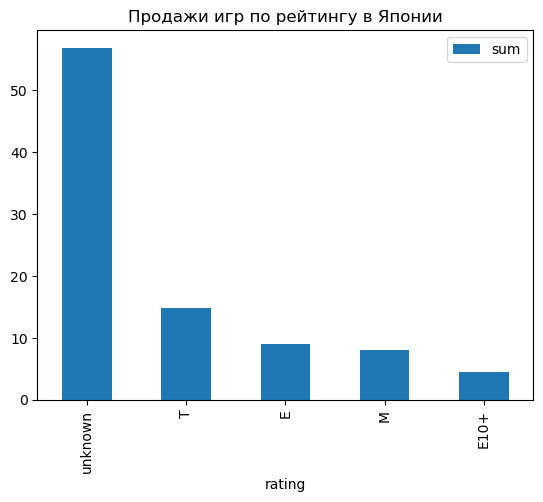

In [129]:
# good_jp_rating.plot(kind="bar").set_title("Продажи игр по рейтингу в Японии")
good_jp_rating.sort_values(by='sum', ascending=False).head(5).plot(kind="bar").set_title("Продажи игр по рейтингу в Японии")

Промежуточный вывод для пользователей JP:
1. Самая популярная платформа - 3DS. 
2. Самый популярный жанр - Action
3. Жанр Action уверено лидирует среди остальных жанров игр. Он превосходит второе и третье место ~ в 5 раз.
4. Можем предположить, что рейтинг ESRB влияет на продажи, так как пользователи в этом регионе в основном приобретали игры с рейтингом Т.

<div class="alert alert-info">

Вывод:
1. Первое, что бросается в глаза, это отличие Японии от Европы и Америки. Япония выделяется тем, что игры с рейтингом Т и игры на платформах 3DS чаще приобретаются потребителями в отличии от пользователей в других регионах. Эти отличительные особенности стоит учитывать при планировании работы на 2017 год. 
2. Во всех регионах игры в жанре Action ппродаются с большим преимуществом. Стоит сделать упор на продажи игр в этом жанре.
3. Стоит обратить внимание на то, что для Америки более актуальны игры для платформы X360, нежели в Европе и Японии. 

<div class="alert alert-info">
Получили данные о играх, у которых нет рейтинга.

Вывод:
1. огромное количество таких игр было продано в Японии. Может в Японии есть свои рейтинги?
2. В Европе и в Америке также видим достаточно большое количество игр без оценки. Поэтому стоит провести дополнительное исследование или обратиться к коллегам, чтобы уточнить можно ли восстановить данные с пропусками в столбце с рейтингом.

#### Вывод:
У каждого региона есть свои особенности в области продаж игр. Пользователи имеют разные предпочтения в выборе платформы (стоит обратить особое внимание на регион JP, так как в нем популярные платформы очень отличаются от популярных платформ в других регионах), выборе жанров игр (несмотря на то, что самый популярный жанр - Action, доля популярности жанров игр в каждом регионе особена). Тем не менее, во всех регионах схож выбор игр по рейтингу. Все пользователи особенно предпочитают игры с рейтингом Е, следом расположились игры с рейтингом Т, М, E10+. 

Шаг 5. Проверим гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотезы:

H_0: Средние пользовательские рейтинги платформы Xbox On = платформе PC

H_1: Средние пользовательские рейтинги платформы Xbox On != платформе PC


Уровень значимосит установим alpha = 0.05

Для проверки гипотезы применим специальный метод .ttest_ind() для проверки гипотезы о равенстве среднего между двух генеральных совокупностей. Используем данный метод, потому что рейтинг для одной платформы не влияет на рейтинг другой. 

Дополнительно установим параметр equal_var=False, так как заранее нам неизвестно, являются ли дисперсии равными.


In [130]:
data = data.replace({'user_score':{'unknown':100}})
data['user_score'] = data['user_score'].astype(float)
# Преобращуем данные, так как в них встречается unknown

In [131]:
data = data.query('user_score != 100')
data = data.query('year_of_release > 2013') # Добавил строку, чтобы получить данные по актуальному периоду

In [132]:
data.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
1,77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
2,92,call of duty: advanced warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
3,94,fifa 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
4,105,fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,16630,sébastien loeb rally evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
884,16643,rugby challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01
885,16652,fast racing neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
886,16660,prison architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,NaN,0.01


In [133]:
results_score = st.ttest_ind(data[data['platform'] =='XOne']['user_score'], data[data['platform'] =='PC']['user_score'], equal_var=False) 
# Проверка гипотезы

In [134]:
print(results_score.pvalue)

alpha = 0.05 # уровень значимости
if results_score.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывае, что есть оснований отвергать нулевую гипотезу.

--------------------------------------------------------------------------------------------------------------------------------

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Гипотезы:

H_0: Средние пользовательские рейтинги жанров Action = жанрам Sports

H_1: Средние пользовательские рейтинги платформы Action != жанрам Sports


Уровень значимосит установим alpha = 0.05

Для проверки гипотезы о равенстве также использовали метод ttest_ind. Дополнительно установим параметр equal_var=False, так как заранее нам неизвестно, являются ли дисперсии равными.

In [135]:
data = data.query('platform in @top_sales_plat_list')


results_genre = st.ttest_ind(data[data['genre'] == 'Action']['user_score'], data[data['genre'] =='Sports']['user_score'], equal_var=False) 
# Проверка гипотезы
print(results_genre.pvalue)

alpha = 0.05 # уровень значимости
if results_genre.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


1.937051521536489e-09
Отвергаем нулевую гипотезу


Значение p-value показывае, что нет оснований отвергать нулевую гипотезу нет. Поэтому будем считать, что эмпирически
полученные данные не противоречат нулевой гипотезе. Поэтому средние пользовательские рейтинги жанров Action и Sports приблизительно могут быть равными.

<div class="alert alert-info">
Вывод: 
1. Что касается первой гипотезы, то значение p-value (0.11) показывает, что нет оснований отвергнуть нулевую гипотезу. Поэтому будем считать, что эмпирически полученные данные не противоречат нулевой гипотезе. Поэтому Средние пользовательские рейтинги платформы Xbox On и PC приблизительно могут быть равными.
2. Что касается второй гипотезы, то значение p-value (1.93) показывает, что есть основания отвергнуть нулевую гипотезу. Поэтому средние пользовательские рейтинги жанров Action и Sports вероятно не равны. 

<div class="alert alert-info">

#### Общий вывод:
1. Стоит обратить внимание на популярность платформ в том или ином регионе. Так Япония сильно отличается от других выделенных регионов (вероятно, это связано с тем, что платформы, которые произведены в регионе JP, более популярны именно в нем), поэтому это стоить учитывать при определении плана\напрпаления деятельности на 2017 год. К примеру, в JP особой популярностью пользуется платформа 3ds, поэтому стоит сфокусировать внимание на продажу игр для этой игровой платформы в JP.
2. Однозначно нужно учитывать факт популярности игр в жанре Action, так как он популярен во всех отдельных регионах. Вероятнее всего популярность данного жанра сохраниться на следующий год. К этому надо быть готовым. 
3. Потребители в Европе и Америке в основном приобретали игры с рейтингом Е, а жители Японии Т. Поэтому стоит обратить внимание именно на игры, которые получили данные рейтинги. Возможно, что Япония выделяется внутренним законодательством, поэтому больше продано игр с рейтингом Т. 
4. Не стоит расчитывать на игры в жанрах: Strategy, Adventure, Puzzle; Также из актуальных платформ не стоит верить в PSP, потому что популярность этой платформы мала. Это объясняется тем, что продажи игр для этой платформы прекратились в 2015 году. По всей видимости плтформа устарела.
5. Считаю, что важным замечанием является то, что, несмотря на популярность и высокие оценки игр в жанре Sports, они не обрели популярность в регионах EU, JP и NA. Эти игры популярны в других странах. Это нужно учитывать при планировании бизнеса в выделенных регионах. 
6. При возможности стоит детальнее рассмотреть продажи в других странах. Выделить их в отдельные регионы и провести дополнительный анализ. Потому что у каждого региона есть свои особенности, которые нужно учитывать при составлении плана на 2017 год.